## Import libraries and data

In [1]:
!pip install kneed

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold

from sklearn.metrics import pairwise_distances_argmin_min

# from sklearn.cluster import AgglomerativeClustering
# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# read data
train_data = pd.read_excel('../../data/processed/subgroup_a_question_2_train.xlxs')
val_data = pd.read_excel('../../data/processed/subgroup_a_question_2_val.xlxs')
test_data = pd.read_excel('../../data/processed/subgroup_a_question_2_test.xlxs')

In [6]:
print(len(train_data)) # 7238
print(len(val_data)) # 28
print(len(test_data)) # 29

7238
28
29


In [7]:
# remove Survey_ID from train_data
train_data = train_data.iloc[:, 1:]

In [8]:
test_data.columns.tolist()

['Age',
 'Gender',
 'Tourist/Local',
 'USS companion [Children]',
 'USS companion [Family]',
 'USS companion [Friends]',
 'USS companion [Significant other]',
 'Visiting frequency',
 'Visiting occasion [Free tickets]',
 'Visiting occasion [Public holiday]',
 'Visiting occasion [School holiday]',
 'Visiting occasion [School/work event]',
 'Visiting occasion [Special events]',
 'Visiting occasion [Special occasion]',
 'Visiting occasion [Weekdays]',
 'Visiting occasion [Weekends]',
 'Attractive factors [Food options]',
 'Attractive factors [Types of rides available]',
 'Attractive factors [Gift shops]',
 'Attractive factors [Special events (e.g. Halloween Horror Night)]',
 'Attractive factors [Accessibility]',
 'Seasonal pass [Frequent visitor to USS]',
 'Seasonal pass [Bundle price]',
 'Seasonal pass [Eligibility during a holiday period]',
 'Time enter',
 'Time leave',
 'Rating experience',
 'Improve experience [Short wait times]',
 'Improve experience [Lack of crowds]',
 'Improve exper

## Feature Engineering

### Standardise and Scale



In [ ]:
# Map 1 to 0 and 2 to 1 to make it binary
train_data.loc[:, 'Tourist/Local'] = train_data['Tourist/Local'].map({1: 0, 2: 1})
train_data.loc[:, 'Gender'] = train_data['Gender'].map({1: 0, 2: 1})

test_data.loc[:, 'Tourist/Local'] = test_data['Tourist/Local'].map({1: 0, 2: 1})
test_data.loc[:, 'Gender'] = test_data['Gender'].map({1: 0, 2: 1})

val_data.loc[:, 'Tourist/Local'] = val_data['Tourist/Local'].map({1: 0, 2: 1})
val_data.loc[:, 'Gender'] = val_data['Gender'].map({1: 0, 2: 1})

# Define binary columns
binary_columns = [
    'Gender',
    'Tourist/Local',
    'USS companion [Children]',
    'USS companion [Family]',
    'USS companion [Friends]',
    'USS companion [Significant other]',
    'Visiting occasion [Free tickets]',
    'Visiting occasion [Public holiday]',
    'Visiting occasion [School holiday]',
    'Visiting occasion [School/work event]',
    'Visiting occasion [Special events]',
    'Visiting occasion [Special occasion]',
    'Visiting occasion [Weekdays]',
    'Visiting occasion [Weekends]',
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale training data
train_features = train_data.drop(columns=binary_columns)
train_data[train_features.columns] = scaler.fit_transform(train_features)

# Scale validation data
val_features = val_data.drop(columns=binary_columns)
val_data[val_features.columns] = scaler.transform(val_features[train_features.columns])

# Scale test data
test_features = test_data.drop(columns=binary_columns)
test_data[test_features.columns] = scaler.transform(test_features[train_features.columns])

# Check the transformed data
print("Transformed Training Data:")
print(train_data.head())
print("\nTransformed Validation Data:")
print(val_data.head())
print("\nTransformed Test Data:")
print(test_data.head())

Transformed Training Data:
    Age  Gender  Tourist/Local  USS companion [Children]  \
0  0.25       0              1                         0   
1  0.25       1              1                         0   
2  0.25       1              1                         0   
3  0.25       1              1                         0   
4  0.25       0              1                         0   

   USS companion [Family]  USS companion [Friends]  \
0                       1                        0   
1                       1                        1   
2                       1                        1   
3                       0                        1   
4                       1                        1   

   USS companion [Significant other]  Visiting frequency  \
0                                  0            0.000000   
1                                  0            0.000000   
2                                  1            0.333333   
3                                  0           

In [10]:
train_data # 7238
# val_data # 28
# test_data # 29

,Age,Gender,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Visiting occasion [Free tickets],Visiting occasion [Public holiday],...,"Purchasing factors [Access to Exclusive Perks (E.g. Fast Pass, VIP Access)]","Purchasing factors [Deals for Tickets (E.g. Multi-Day Ticket Discounts, Family Bundles, Credit Card Offers)]",Purchasing factors [Loyalty Points],Purchasing factors [Clear Pricing Information],"Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]",Purchasing factors [Clear Refund and Exchange Policies],Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase]
0,0.25,0,1,0,1,0,0,0.000000,0,0,...,0.75,0.75,0.75,1.00,1.00,1.00,0.75,0.25,0.75,0.50
1,0.25,1,1,0,1,1,0,0.000000,0,0,...,0.75,1.00,0.75,1.00,1.00,0.75,1.00,0.75,0.75,0.25
2,0.25,1,1,0,1,1,1,0.333333,0,1,...,0.75,1.00,0.75,1.00,0.50,0.50,1.00,0.50,0.50,0.50
3,0.25,1,1,0,0,1,0,0.000000,0,0,...,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.25,0.50,0.75
4,0.25,0,1,0,1,1,0,0.000000,0,1,...,1.00,1.00,0.75,1.00,0.75,0.75,1.00,0.75,0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7233,0.00,0,0,0,1,0,0,0.000000,0,0,...,0.25,0.50,0.50,1.00,1.00,1.00,0.75,0.75,1.00,0.50
7234,0.00,0,0,0,0,0,0,0.000000,0,0,...,0.25,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.75,0.50
7235,0.25,0,0,0,1,1,0,0.000000,0,0,...,0.50,0.75,0.50,0.75,0.50,0.50,1.00,0.50,0.50,0.50
7236,0.00,1,0,0,0,0,0,0.000000,0,0,...,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50


### Correlation Matrix

- Done on training data only, removed repetitive questions

In [11]:
train_data.columns.tolist()

['Age',
 'Gender',
 'Tourist/Local',
 'USS companion [Children]',
 'USS companion [Family]',
 'USS companion [Friends]',
 'USS companion [Significant other]',
 'Visiting frequency',
 'Visiting occasion [Free tickets]',
 'Visiting occasion [Public holiday]',
 'Visiting occasion [School holiday]',
 'Visiting occasion [School/work event]',
 'Visiting occasion [Special events]',
 'Visiting occasion [Special occasion]',
 'Visiting occasion [Weekdays]',
 'Visiting occasion [Weekends]',
 'Attractive factors [Food options]',
 'Attractive factors [Types of rides available]',
 'Attractive factors [Gift shops]',
 'Attractive factors [Special events (e.g. Halloween Horror Night)]',
 'Attractive factors [Accessibility]',
 'Seasonal pass [Frequent visitor to USS]',
 'Seasonal pass [Bundle price]',
 'Seasonal pass [Eligibility during a holiday period]',
 'Time enter',
 'Time leave',
 'Rating experience',
 'Improve experience [Short wait times]',
 'Improve experience [Lack of crowds]',
 'Improve exper

In [ ]:
# Start by copying the original data
red_train = train_data.copy()

# Drop specific columns first (as per your list)
columns_to_drop = [
    'Time enter',
    'Time leave'
]
red_train = red_train.drop(columns=columns_to_drop, errors='ignore')

red_train['Average tolerable ticket price'] = red_train[[
    'Max tolerable ticket price [Peak]',
    'Max tolerable ticket price [Non-peak]'
]].mean(axis=1)

# 1. Combine Attractions into broader categories (Thrill Rides, Family-friendly, Shows/Entertainment)
red_train['Attractions appeal [Thrill Rides]'] = red_train[[
    'Attractions appeal [Revenge of the Mummy]',
    'Attractions appeal [Jurassic Park Rapids Adventure]',
    'Attractions appeal [Battlestar Galactica: Human vs. Cylon]',
    'Attractions appeal [Transformers The Ride: The Ultimate 3D Battle]'
    # 'Attractions appeal [Enchanted Airways]',
    # 'Attractions appeal [Canopy Flyer]',
    # "Attractions appeal [Puss In Boots' Giant Journey]"
]].mean(axis=1)

red_train['Attractions appeal [Family-friendly]'] = red_train[[
    'Attractions appeal [Sesame Street Spaghetti Space Chase]',
    'Attractions appeal [Canopy Flyer]',
    'Attractions appeal [Accelerator (Spinning Ride)]',
    'Attractions appeal [Enchanted Airways]',
    "Attractions appeal [Dino-Soarin']",
    "Attractions appeal [Puss In Boots' Giant Journey]",
    'Attractions appeal [Magic Potion Spin (Far Far Away Ferris Wheel)]',
    'Attractions appeal [The Dance for the Magic Beans (Interactive show with Puss in Boots and Kitty Softpaws)]',
    'Attractions appeal [Treasure Hunters (Vintage Car Attraction)]',
    'Attractions appeal [Enchanted Airways]',
    'Attractions appeal [Canopy Flyer]',
    "Attractions appeal [Puss In Boots' Giant Journey]",
    'Attractions appeal [Donkey Live]',
    'Attractions appeal [WaterWorld]',
    'Attractions appeal [Lights, Camera, Action!]',
    'Attractions appeal [Shrek 4-D Adventure]',
    'Attractions appeal [Lights, Camera, Action!]',
    'Attractions appeal [Rhythm Truck 2.0]'
    # ... add other family-friendly attractions ...
]].mean(axis=1)

# red_train['Attractions appeal [Shows/Entertainment]'] = red_train[[
#     'Attractions appeal [Donkey Live]',
#     'Attractions appeal [WaterWorld]',
#     'Attractions appeal [Lights, Camera, Action!]',
#     'Attractions appeal [Shrek 4-D Adventure]',
#     'Attractions appeal [Lights, Camera, Action!]'
# ]].mean(axis=1)

attraction_columns_to_drop = [
    'Attractions appeal [Revenge of the Mummy]',
    'Attractions appeal [Treasure Hunters (Vintage Car Attraction)]',
    'Attractions appeal [The Dance for the Magic Beans (Interactive show with Puss in Boots and Kitty Softpaws)]',
    'Attractions appeal [Rhythm Truck 2.0]',
    'Attractions appeal [Magic Potion Spin (Far Far Away Ferris Wheel)]',
    'Attractions appeal [Donkey Live]',
    "Attractions appeal [Puss In Boots' Giant Journey]",
    'Attractions appeal [Jurassic Park Rapids Adventure]',
    'Attractions appeal [Battlestar Galactica: Human vs. Cylon]',
    'Attractions appeal [Transformers The Ride: The Ultimate 3D Battle]',
    'Attractions appeal [Sesame Street Spaghetti Space Chase]',
    'Attractions appeal [Canopy Flyer]',
    "Attractions appeal [Dino-Soarin']",
    'Attractions appeal [Enchanted Airways]',
    'Attractions appeal [Accelerator (Spinning Ride)]',
    'Attractions appeal [Lights, Camera, Action!]',
    'Attractions appeal [Shrek 4-D Adventure]',
    'Attractions appeal [WaterWorld]'
]
red_train = red_train.drop(columns=attraction_columns_to_drop, errors='ignore')

# 2. Combine Ticket Purchase Avenues
red_train['Purchase Channel [Online]'] = red_train[[
    'Ticket purchase avenues [USS Website]',
    'Ticket purchase avenues [Other Websites]',
    'USS website purchase experience'
]].mean(axis=1)

red_train['Purchase Channel [In-Person/Others]'] = red_train[[
    'Ticket purchase avenues [USS Physical Ticket Counter]',
    'Ticket purchase avenues [Resalers]',
    'Ticket purchase avenues [Staff Tickets]'
]].mean(axis=1)

ticket_columns_to_drop = [
    'Ticket purchase avenues [USS Website]',
    'Ticket purchase avenues [Other Websites]',
    'Ticket purchase avenues [USS Physical Ticket Counter]',
    'Ticket purchase avenues [Resalers]',
    'Ticket purchase avenues [Staff Tickets]'
]
red_train = red_train.drop(columns=ticket_columns_to_drop, errors='ignore')

# 3. Experience
red_train['Experience [Food, Retail & Amenities]'] = red_train[[
    'Attractive factors [Food options]',
    'Attractive factors [Types of rides available]',
    'Attractive factors [Gift shops]',
    'Improve experience [Affordable food options]',
    'USS experience rating [Cleanliness of Park and Amenities]',
    'USS experience rating [Staff Friendliness]',
    'USS experience rating [Availability of Rest Areas]',
    'USS experience rating [Quality and Variety of Food/Beverage Options]',
    'USS experience rating [Value for Money (Entrance Fee, Food, etc)]',
    'USS experience rating [Variety and Quality of Souvenir Shops]',
    'USS experience rating [Theme and Atmosphere]',
    'USS experience rating [Presence of Shaded Rest Areas]',
    'Return factors [Enjoyed the overall experience]',
    'Return factors [Staying at a Sentosa resort (E.g. RWS)]',
    'Return factors [Good Food and Dining Options]',
    'Return factors [Good Customer Service]',
    'Return factors [Souvenirs]',
    'Improve experience [Usability of the Universal Studios Singapore App]',
]].mean(axis=1)

red_train['Experience [Entertainment]'] = red_train[[
    'Attractions appeal [Family-friendly]',
    'Attractions appeal [Thrill Rides]',
    # 'Attractions appeal [Shows/Entertainment]',
    'Attractive factors [Types of rides available]',
    'Attractive factors [Special events (e.g. Halloween Horror Night)]',
    'Improve experience [Fun attractions]',
    'Improve experience [Short wait times]',
    'Improve experience [Lack of crowds]',
    'Planning route [Enjoyment of the ride]',
    'Improve queueing [Entertainment in Queuing Area (e.g. Videos, Interactive Elements)]',
    'Improve queueing [Anticipation of Ride]',
    'USS experience rating [Variety of Rides and Attractions]',
    'USS experience rating [Entertainment and Shows (e.g. Rollercoasters, WaterWorld Performance)]',
    'USS experience rating [Crowdedness]',
    'USS experience rating [Special Events and Performances (E.g. Halloween Horror Night)]',
    'Likelihood of return [General]',
    'Return factors [Enjoyed the overall experience]',
    'Return factors [New Rides, Shows and Attractions]',
    'Return factors [Special Occasions (E.g. Halloween Horror Night)]',
    'Likelihood of recommendation'
]].mean(axis=1)

red_train['Experience [Comfort]'] = red_train[[
    'Improve experience [Cooling Weather]',
    'Improve experience [Presence of Shaded Rest Areas]',
    'Improve experience [Lack of crowds]',
    'Improve queueing [Shaded/Cooling Queuing Area]',
    'Improve queueing [Comfortable Seating along Queuing Area]',
    'Improve queueing [Music in the Queuing Area]',
    'Improve queueing [Line moving at a Consistent Pace]',
    'Improve queueing [Restrooms Nearby/Accessible during the Queue]',
    'USS experience rating [Crowdedness]',
    'USS experience rating [Presence of Shaded Rest Areas]',
    'USS experience rating [Weather on the Day of Visit]',
    'USS experience rating [Park Layout and Navigation]',
    'Return factors [Enjoyed the overall experience]'
]].mean(axis=1)

red_train['Return [Hotel]'] = red_train[[
    'Return factors [Staying at a Sentosa resort (E.g. RWS)]'
]].mean(axis=1)

red_train['Queue Management'] = red_train[[
    'USS experience rating [Queue Management]',
    'Improve queueing [Entertainment in Queuing Area (e.g. Videos, Interactive Elements)]',
    'Improve queueing [Anticipation of Ride]',
    'Improve queueing [Shaded/Cooling Queuing Area]',
    'Improve queueing [Comfortable Seating along Queuing Area]',
    'Improve queueing [Music in the Queuing Area]',
    'Improve queueing [Line moving at a Consistent Pace]',
    'Improve queueing [Restrooms Nearby/Accessible during the Queue]',
    'Improve queueing [Positive Prior Experience with Ride]',
    'Wet weather waiting tolerance',
    'Planning route [Expected wait time]',
    'Improve experience [Short wait times]',
    'Improve experience [Lack of crowds]',
    'Planning route [Expected wait time]',
    'USS experience rating [Queue Management]'
]].mean(axis=1)

# 4. Seasonal Pass and Express Pass
red_train['Express & Seasonal Pass'] = red_train[[
    'Seasonal pass [Frequent visitor to USS]',
    'Seasonal pass [Eligibility during a holiday period]',
    'Seasonal pass [Bundle price]',
    'Express pass purchase',
    'Likelihood of return [Season/Unlimited]'
]].mean(axis=1)

# 8. Wet Weather
red_train['Wet Weather [Indoor Activities]'] = red_train[[
    'Wet weather [Seek shelter in a restaurant]',
    'Wet weather [Visit indoor attractions]',
    'Wet weather [Visit gift shops/retail areas]'
]].mean(axis=1)

red_train['Wet Weather [Outdoor/Go Home]'] = red_train[[
    'Wet weather [Go home]',
    "Wet weather [Visit outdoor attractions (I don't mind getting wet)]"
]].mean(axis=1)

# 15. Waiting
red_train['Waiting [Normal Rides/Wet Weather]'] = red_train[[
    'Wet weather waiting tolerance',
    'Ride waiting tolerance',
    'Planning route [Expected wait time]',
    'USS experience rating [Waiting Time]'
]].mean(axis=1)

# 12. Return
red_train['Return [Enjoyment & Events]'] = red_train[[
    'Return factors [Enjoyed the overall experience]',
    'Return factors [Good Customer Service]',
    'Return factors [Special Occasions (E.g. Halloween Horror Night)]',
    'Return factors [Ticket Discounts and Promotions]',
    'Return factors [School/work Activity]',
    'Return factors [New Rides, Shows and Attractions]',
    'Return factors [Good Food and Dining Options]'
]].mean(axis=1)

red_train['Return [Hotel]'] = red_train[[
    'Return factors [Staying at a Sentosa resort (E.g. RWS)]'
]].mean(axis=1)

# 13. Purchasing factors
red_train['Purchasing [Ease & Options]'] = red_train[[
    'Purchasing factors [Ease of Navigate USS Website/Booking Platform]',
    'Purchasing factors [Mobile App Integration]',
    'Purchasing factors [Option for Digital Tickets (No printing Required)]',
    'Purchasing factors [Fast Checkout Process]',
    'Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]',
    'Purchasing factors [Clear Pricing Information]',
    'USS website purchase experience'
]].mean(axis=1)

red_train['Purchasing [Perks]'] = red_train[[
    'Purchasing factors [Access to Exclusive Perks (E.g. Fast Pass, VIP Access)]',
    'Purchasing factors [Deals for Tickets (E.g. Multi-Day Ticket Discounts, Family Bundles, Credit Card Offers)]',
    'Purchasing factors [Loyalty Points]',
    'Purchasing factors [Option to Add-On Parking Passes during Purchase]',
    'Return factors [Ticket Discounts and Promotions]'
]].mean(axis=1)

red_train['Purchasing [Recommendations & Support]'] = red_train[[
    'Purchasing factors [Personalised Recommendations based on Visitor Preferences]',
    'Purchasing factors [Live Chat/Support for Booking Assistance]'
]].mean(axis=1)

# 4. Visiting Occasions and Companions
red_train.loc[:, 'Visiting Occasion [Holiday/Weekend]'] = (
    red_train['Visiting occasion [Public holiday]'].astype(int) |
    red_train['Visiting occasion [School holiday]'].astype(int) |
    red_train['Visiting occasion [Weekends]'].astype(int)
)

# Ensure the dtype is correct by casting to int if needed
red_train['Visiting Occasion [Holiday/Weekend]'] = red_train['Visiting Occasion [Holiday/Weekend]'].astype(int)

red_train['Visiting Occasion [Special]'] = red_train[[
    'Visiting occasion [Free tickets]',
    'Visiting occasion [Special occasion]',
    'Visiting occasion [School/work event]',
    'Visiting occasion [Special events]',
    'Return factors [School/work Activity]'
]].mean(axis=1)

# 14. Accessibility
red_train['Accessibility'] = red_train[[
    'Attractive factors [Accessibility]',
    'Improve experience [Accessibility (Ramps, even ground, easy to find seats etc)]',
    'USS experience rating [Accessibility (Wheelchair friendly, etc)]',
    'USS experience rating [Parking Convenience and Accessibility]'
]].mean(axis=1)

accessibility_columns_to_drop = [
    'Attractive factors [Accessibility]',
    'Improve experience [Accessibility (Ramps, even ground, easy to find seats etc)]',
    'USS experience rating [Accessibility (Wheelchair friendly, etc)]',
    'USS experience rating [Parking Convenience and Accessibility]'
]
red_train = red_train.drop(columns=accessibility_columns_to_drop, errors='ignore')

# Combine the specified columns into a new feature
red_train['Planning Factors [Combined]'] = red_train[[
    'Planning route [Expected wait time]',
    'Planning route [Closeness of ride to current location]',
    "Planning route [Prioritisation of Group's Preferences (e.g. going with your family and choosing to go to the rides that your younger siblings prefer)]"
]].mean(axis=1)  # Use sum(axis=1) if you prefer summing

# Optionally drop the original columns if they are no longer needed
columns_to_drop = [
    'Planning route [Expected wait time]',
    'Planning route [Closeness of ride to current location]',
    "Planning route [Prioritisation of Group's Preferences (e.g. going with your family and choosing to go to the rides that your younger siblings prefer)]"
]
red_train = red_train.drop(columns=columns_to_drop, errors='ignore')

###
express_seasonal_pass_columns_to_drop = [
    'Seasonal pass [Frequent visitor to USS]',
    'Seasonal pass [Eligibility during a holiday period]',
    'Seasonal pass [Bundle price]',
    'Express pass purchase',
    'Likelihood of return [Season/Unlimited]'
]
red_train = red_train.drop(columns=express_seasonal_pass_columns_to_drop, errors='ignore')

wet_weather_columns_to_drop = [
    'Wet weather [Seek shelter in a restaurant]',
    'Wet weather [Visit indoor attractions]',
    'Wet weather [Visit gift shops/retail areas]',
    'Wet weather [Go home]',
    "Wet weather [Visit outdoor attractions (I don't mind getting wet)]"
]
red_train = red_train.drop(columns=wet_weather_columns_to_drop, errors='ignore')

waiting_columns_to_drop = [
    'Wet weather waiting tolerance',
    'Ride waiting tolerance',
    'USS experience rating [Waiting Time]',
]
red_train = red_train.drop(columns=waiting_columns_to_drop, errors='ignore')

return_columns_to_drop = [
    'Return factors [Enjoyed the overall experience]',
    'Return factors [Good Customer Service]',
    'Return factors [Special Occasions (E.g. Halloween Horror Night)]',
    'Return factors [Ticket Discounts and Promotions]',
    'Return factors [School/work Activity]',
    'Return factors [Staying at a Sentosa resort (E.g. RWS)]',
    'Return factors [Souvenirs]',
    'Likelihood of return [General]',
    'Likelihood of recommendation',
    'Return factors [New Rides, Shows and Attractions]',
    'Return factors [Good Food and Dining Options]'
]
red_train = red_train.drop(columns=return_columns_to_drop, errors='ignore')

purchasing_columns_to_drop = [
    'Purchasing factors [Ease of Navigate USS Website/Booking Platform]',
    'Purchasing factors [Mobile App Integration]',
    'Purchasing factors [Option for Digital Tickets (No printing Required)]',
    'Purchasing factors [Fast Checkout Process]',
    'Purchasing factors [Access to Exclusive Perks (E.g. Fast Pass, VIP Access)]',
    'Purchasing factors [Deals for Tickets (E.g. Multi-Day Ticket Discounts, Family Bundles, Credit Card Offers)]',
    'Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]',
    'Purchasing factors [Clear Refund and Exchange Policies]',
    'Purchasing factors [Loyalty Points]',
    'Purchasing factors [Clear Pricing Information]',
    'Purchasing factors [Personalised Recommendations based on Visitor Preferences]',
    'Purchasing factors [Live Chat/Support for Booking Assistance]',
    'Purchasing factors [Option to Add-On Parking Passes during Purchase]',
]
red_train = red_train.drop(columns=purchasing_columns_to_drop, errors='ignore')

occasion_columns_to_drop = [
    'Visiting occasion [Free tickets]',
    'Visiting occasion [Public holiday]',
    'Visiting occasion [School holiday]',
    'Visiting occasion [School/work event]',
    'Visiting occasion [Special events]',
    'Visiting occasion [Special occasion]',
    'Visiting occasion [Weekdays]',
    'Visiting occasion [Weekends]'
]
red_train = red_train.drop(columns=occasion_columns_to_drop, errors='ignore')

to_drop = [
    'Max tolerable ticket price [Peak]',
    'Max tolerable ticket price [Non-peak]',
    'Attractions appeal [Revenge of the Mummy]',
    'Attractions appeal [Treasure Hunters (Vintage Car Attraction)]',
    'Attractions appeal [The Dance for the Magic Beans (Interactive show with Puss in Boots and Kitty Softpaws)]',
    'Attractions appeal [Rhythm Truck 2.0]',
    'Attractions appeal [Magic Potion Spin (Far Far Away Ferris Wheel)]',
    'Attractions appeal [Donkey Live]',
    "Attractions appeal [Puss In Boots' Giant Journey]",
    'Attractions appeal [Jurassic Park Rapids Adventure]',
    'Attractions appeal [Battlestar Galactica: Human vs. Cylon]',
    'Attractions appeal [Transformers The Ride: The Ultimate 3D Battle]',
    'Attractions appeal [Sesame Street Spaghetti Space Chase]',
    'Attractions appeal [Canopy Flyer]',
    "Attractions appeal [Dino-Soarin']",
    'Attractions appeal [Enchanted Airways]',
    'Attractions appeal [Accelerator (Spinning Ride)]',
    'Attractions appeal [Lights, Camera, Action!]',
    'Attractions appeal [Shrek 4-D Adventure]',
    'Attractions appeal [WaterWorld]',
    'Ticket purchase avenues [USS Website]',
    'Ticket purchase avenues [Other Websites]',
    'Ticket purchase avenues [USS Physical Ticket Counter]',
    'Ticket purchase avenues [Resalers]',
    'Ticket purchase avenues [Staff Tickets]',
    'Attractive factors [Food options]',
    'Attractive factors [Types of rides available]',
    'Attractive factors [Gift shops]',
    'Improve experience [Affordable food options]',
    'USS experience rating [Cleanliness of Park and Amenities]',
    'USS experience rating [Staff Friendliness]',
    'USS experience rating [Availability of Rest Areas]',
    'USS experience rating [Quality and Variety of Food/Beverage Options]',
    'USS experience rating [Value for Money (Entrance Fee, Food, etc)]',
    'USS experience rating [Variety and Quality of Souvenir Shops]',
    'USS experience rating [Theme and Atmosphere]',
    'USS experience rating [Presence of Shaded Rest Areas]',
    'Return factors [Enjoyed the overall experience]',
    'Return factors [Staying at a Sentosa resort (E.g. RWS)]',
    'Return factors [Good Food and Dining Options]',
    'Return factors [Good Customer Service]',
    'Return factors [Souvenirs]',
    'Improve experience [Usability of the Universal Studios Singapore App]',
    # 'Attractions appeal [Family-friendly]',
    # 'Attractions appeal [Thrill Rides]',
    # 'Attractions appeal [Shows/Entertainment]',
    'Attractive factors [Special events (e.g. Halloween Horror Night)]',
    'Improve experience [Fun attractions]',
    'Improve experience [Short wait times]',
    'Improve experience [Lack of crowds]',
    'Planning route [Enjoyment of the ride]',
    'Improve queueing [Entertainment in Queuing Area (e.g. Videos, Interactive Elements)]',
    'Improve queueing [Anticipation of Ride]',
    'USS experience rating [Variety of Rides and Attractions]',
    'USS experience rating [Entertainment and Shows (e.g. Rollercoasters, WaterWorld Performance)]',
    'USS experience rating [Crowdedness]',
    'USS experience rating [Special Events and Performances (E.g. Halloween Horror Night)]',
    'Likelihood of return [General]',
    'Return factors [New Rides, Shows and Attractions]',
    'Return factors [Special Occasions (E.g. Halloween Horror Night)]',
    'Likelihood of recommendation',
    'Improve experience [Cooling Weather]',
    'Improve experience [Presence of Shaded Rest Areas]',
    'Improve experience [Lack of crowds]',
    'Improve queueing [Shaded/Cooling Queuing Area]',
    'Improve queueing [Comfortable Seating along Queuing Area]',
    'Improve queueing [Music in the Queuing Area]',
    'Improve queueing [Line moving at a Consistent Pace]',
    'Improve queueing [Restrooms Nearby/Accessible during the Queue]',
    'USS experience rating [Crowdedness]',
    'USS experience rating [Presence of Shaded Rest Areas]',
    'USS experience rating [Weather on the Day of Visit]',
    'USS experience rating [Park Layout and Navigation]',
    'Improve queueing [Positive Prior Experience with Ride]',
    'USS experience rating [Queue Management]',
    'USS website purchase experience'
]

red_train = red_train.drop(columns=to_drop, errors='ignore')

# Display the resulting DataFrame
print("DataFrame after feature grouping:")
red_train

DataFrame after feature grouping:


,Age,Gender,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Rating experience,Average tolerable ticket price,...,Wet Weather [Outdoor/Go Home],Waiting [Normal Rides/Wet Weather],Return [Enjoyment & Events],Purchasing [Ease & Options],Purchasing [Perks],Purchasing [Recommendations & Support],Visiting Occasion [Holiday/Weekend],Visiting Occasion [Special],Accessibility,Planning Factors [Combined]
0,0.25,0,1,0,1,0,0,0.000000,0.666667,0.416667,...,0.375,0.5625,0.642857,0.728571,0.70,0.500,1,0.35,0.5000,0.500000
1,0.25,1,1,0,1,1,0,0.000000,0.333333,0.416667,...,0.375,0.6250,0.857143,0.792857,0.75,0.750,1,0.55,0.3750,0.833333
2,0.25,1,1,0,1,1,1,0.333333,0.666667,0.416667,...,0.375,0.5625,0.750000,0.807143,0.80,0.500,1,0.50,0.5000,0.750000
3,0.25,1,1,0,0,1,0,0.000000,0.333333,0.333333,...,0.375,0.4375,0.607143,0.864286,0.70,0.375,1,0.10,0.3750,0.750000
4,0.25,0,1,0,1,1,0,0.000000,0.666667,0.666667,...,0.250,0.6875,0.857143,0.835714,0.85,0.625,1,0.40,0.7500,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7233,0.00,0,0,0,1,0,0,0.000000,0.666667,0.833333,...,0.500,0.6250,0.678571,0.764286,0.40,0.875,1,0.20,0.4375,0.833333
7234,0.00,0,0,0,0,0,0,0.000000,0.333333,0.500000,...,0.125,0.4375,0.500000,0.657143,0.40,0.625,0,0.10,0.4375,0.750000
7235,0.25,0,0,0,1,1,0,0.000000,0.666667,0.250000,...,0.375,0.5000,0.642857,0.657143,0.60,0.500,1,0.15,0.5625,0.583333
7236,0.00,1,0,0,0,0,0,0.000000,0.333333,0.500000,...,0.375,0.5625,0.500000,0.514286,0.50,0.500,0,0.10,0.3750,0.500000


In [14]:
red_train.columns.tolist()

['Age',
 'Gender',
 'Tourist/Local',
 'USS companion [Children]',
 'USS companion [Family]',
 'USS companion [Friends]',
 'USS companion [Significant other]',
 'Visiting frequency',
 'Rating experience',
 'Average tolerable ticket price',
 'Attractions appeal [Thrill Rides]',
 'Attractions appeal [Family-friendly]',
 'Purchase Channel [Online]',
 'Purchase Channel [In-Person/Others]',
 'Experience [Food, Retail & Amenities]',
 'Experience [Entertainment]',
 'Experience [Comfort]',
 'Return [Hotel]',
 'Queue Management',
 'Express & Seasonal Pass',
 'Wet Weather [Indoor Activities]',
 'Wet Weather [Outdoor/Go Home]',
 'Waiting [Normal Rides/Wet Weather]',
 'Return [Enjoyment & Events]',
 'Purchasing [Ease & Options]',
 'Purchasing [Perks]',
 'Purchasing [Recommendations & Support]',
 'Visiting Occasion [Holiday/Weekend]',
 'Visiting Occasion [Special]',
 'Accessibility',
 'Planning Factors [Combined]']

In [15]:
corr_red_train = red_train.copy()

corr_red_train = corr_red_train.drop(columns=[
    'Experience [Comfort]',
    'Return [Enjoyment & Events]',
    'Experience [Entertainment]',
    'Planning Factors [Combined]',
    'Purchasing [Ease & Options]',
    'Queue Management',
    'Experience [Food, Retail & Amenities]',
    'Purchasing [Perks]',
    'Visiting Occasion [Special]',
    'Wet Weather [Indoor Activities]',
    'Gender',
    'Purchase Channel [In-Person/Others]',
    'Visiting Occasion [Holiday/Weekend]',
    'Attractions appeal [Thrill Rides]',
    'Attractions appeal [Family-friendly]',
    'Average tolerable ticket price'
])

corr_red_train

,Age,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Rating experience,Purchase Channel [Online],Return [Hotel],Express & Seasonal Pass,Wet Weather [Outdoor/Go Home],Waiting [Normal Rides/Wet Weather],Purchasing [Recommendations & Support],Accessibility
0,0.25,1,0,1,0,0,0.000000,0.666667,0.533333,0.50,0.25,0.375,0.5625,0.500,0.5000
1,0.25,1,0,1,1,0,0.000000,0.333333,0.600000,0.50,0.55,0.375,0.6250,0.750,0.3750
2,0.25,1,0,1,1,1,0.333333,0.666667,0.466667,0.50,0.45,0.375,0.5625,0.500,0.5000
3,0.25,1,0,0,1,0,0.000000,0.333333,0.600000,0.00,0.65,0.375,0.4375,0.375,0.3750
4,0.25,1,0,1,1,0,0.000000,0.666667,0.533333,1.00,0.65,0.250,0.6875,0.625,0.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7233,0.00,0,0,1,0,0,0.000000,0.666667,0.533333,0.00,0.40,0.500,0.6250,0.875,0.4375
7234,0.00,0,0,0,0,0,0.000000,0.333333,0.200000,0.25,0.30,0.125,0.4375,0.625,0.4375
7235,0.25,0,0,1,1,0,0.000000,0.666667,0.533333,0.50,0.60,0.375,0.5000,0.500,0.5625
7236,0.00,0,0,0,0,0,0.000000,0.333333,0.533333,0.50,0.20,0.375,0.5625,0.500,0.3750


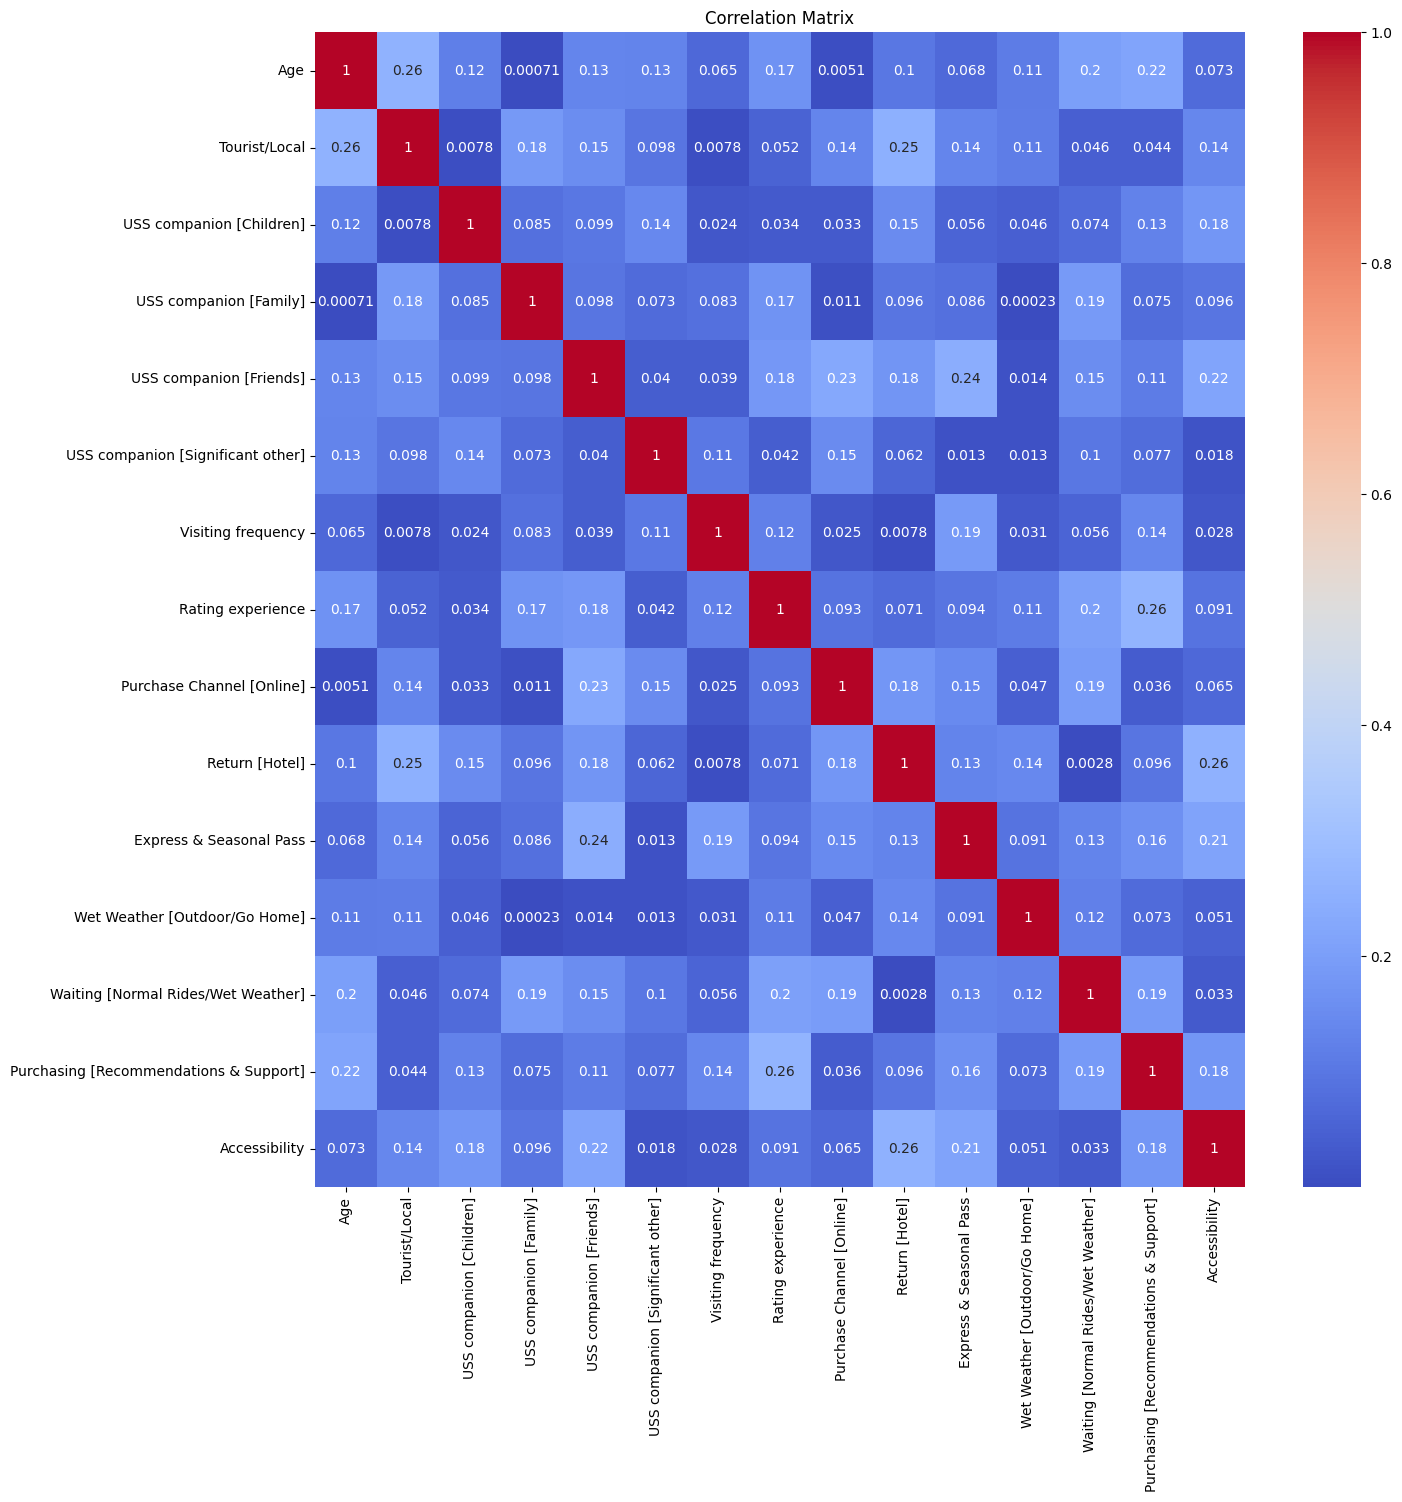

In [16]:
# kendall
correlation_matrix = corr_red_train.corr(method='kendall').abs()
plt.figure(figsize=(15, 15))  # Adjust width and height as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
corr_red_train.columns.tolist()

['Age',
 'Tourist/Local',
 'USS companion [Children]',
 'USS companion [Family]',
 'USS companion [Friends]',
 'USS companion [Significant other]',
 'Visiting frequency',
 'Rating experience',
 'Purchase Channel [Online]',
 'Return [Hotel]',
 'Express & Seasonal Pass',
 'Wet Weather [Outdoor/Go Home]',
 'Waiting [Normal Rides/Wet Weather]',
 'Purchasing [Recommendations & Support]',
 'Accessibility']

### Kernel PCA

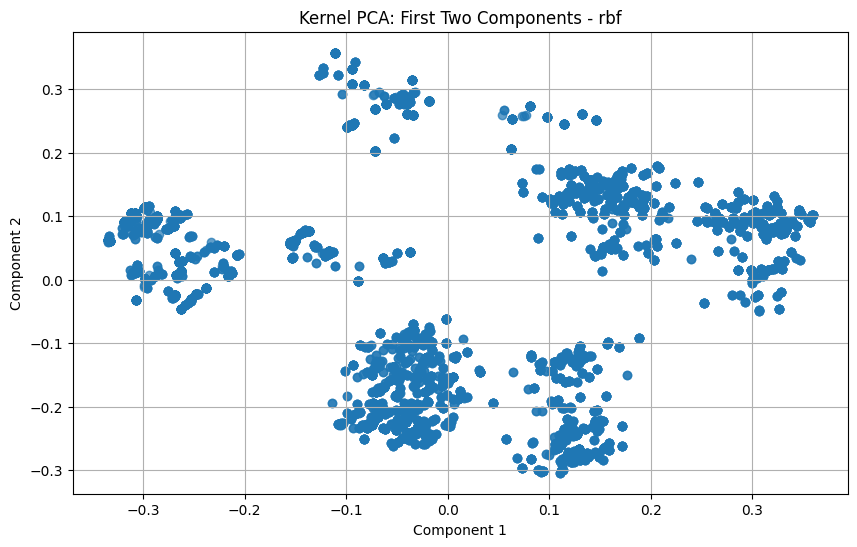

In [ ]:
kernel_pca = KernelPCA(n_components=2, kernel='rbf', random_state=42)
kernel_pca_data = kernel_pca.fit_transform(corr_red_train)

# Visualize the results (if you reduced to 2 components)
plt.figure(figsize=(10, 6))
plt.scatter(kernel_pca_data[:, 0], kernel_pca_data[:, 1], alpha=0.7)
plt.title('Kernel PCA: First Two Components - rbf')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
plt.show()

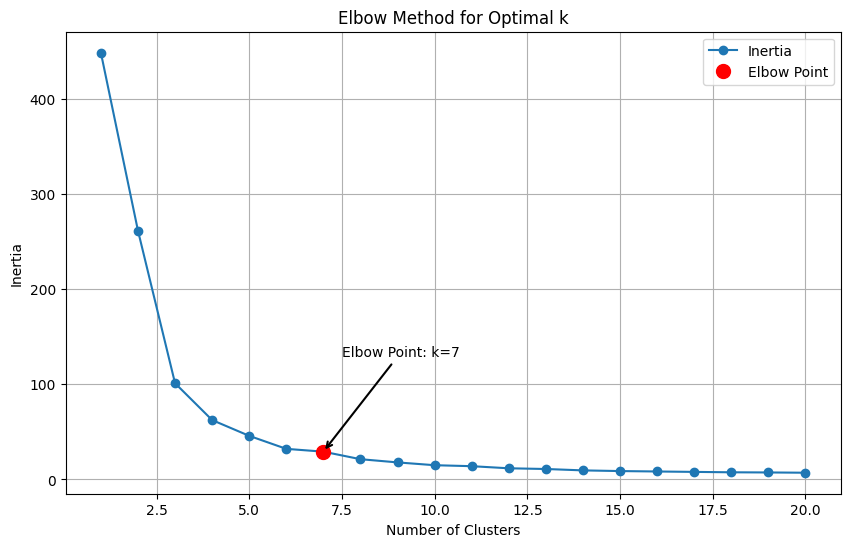

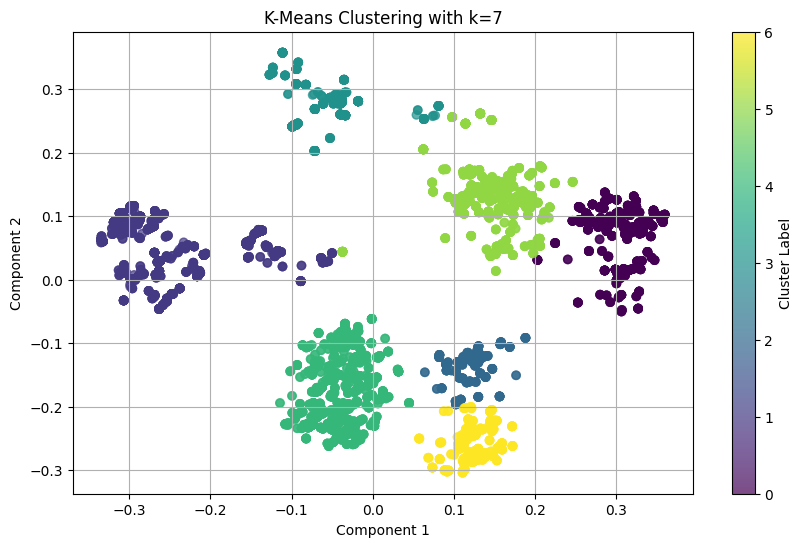

In [ ]:
# Find the optimal number of clusters
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kernel_pca_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()

# Calculate the elbow point using the second derivative approach
# Find the differences
diff = np.diff(inertia)
# Find the second difference
second_diff = np.diff(diff)

# Check if there are any negative values in second_diff
# If not, fall back to a visual inspection or a different method
if np.any(second_diff < 0):
    elbow_point = np.argwhere(second_diff < 0)[0][0] + 2  # +2 because of the two differences
else:
    # Fallback: Visual inspection or a different method to find the elbow point
    print("Warning: Second derivative method did not find a clear elbow point. Please inspect the plot visually.")
    # For visual inspection, you can comment out the automatic elbow point detection and manually choose a k
    elbow_point = 3  # Example: Manually set elbow point to 3

# Highlight the elbow point on the plot (if found automatically)
if np.any(second_diff < 0):
    plt.plot(elbow_point, inertia[elbow_point - 1], 'ro', markersize=10, label='Elbow Point')
    plt.annotate(f'Elbow Point: k={elbow_point}',
                 xy=(elbow_point, inertia[elbow_point - 1]),
                 xytext=(elbow_point + 0.5, inertia[elbow_point - 1] + 100),
                 arrowprops=dict(arrowstyle='->', lw=1.5),
                 fontsize=10)

plt.legend()
plt.show()

# Choose the optimal k based on the elbow point
optimal_k = elbow_point
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(kernel_pca_data)

# Visualize K-Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(kernel_pca_data[:, 0], kernel_pca_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
plt.colorbar(label='Cluster Label')
plt.show()

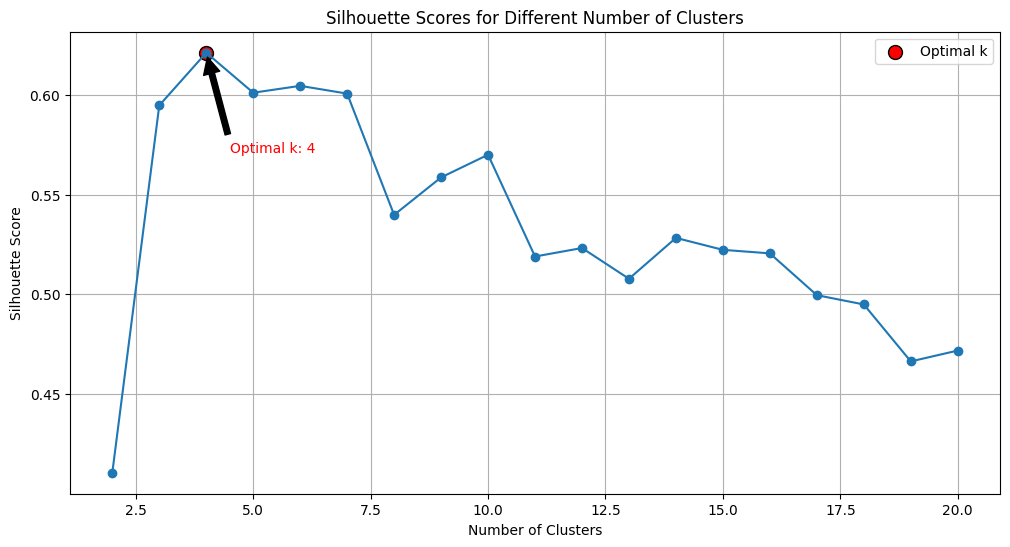

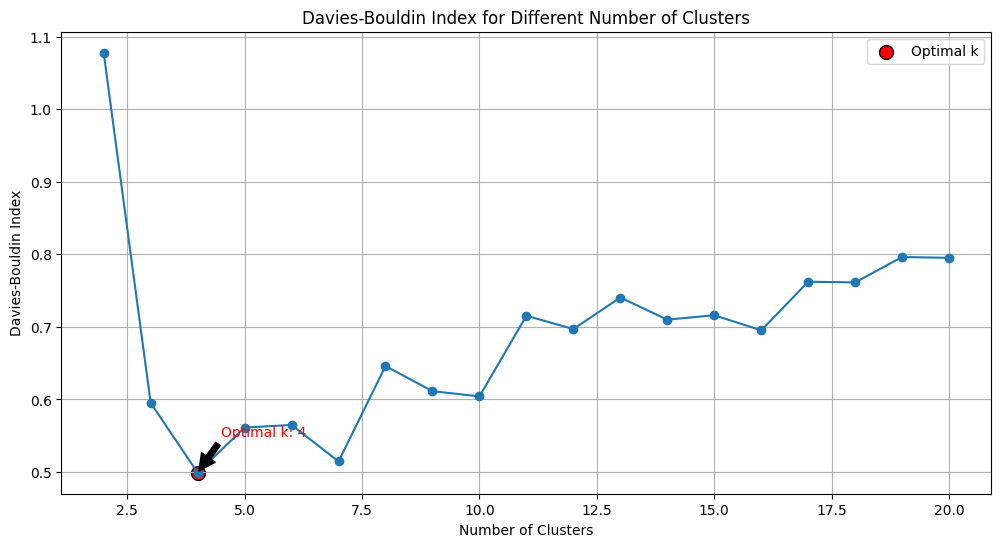

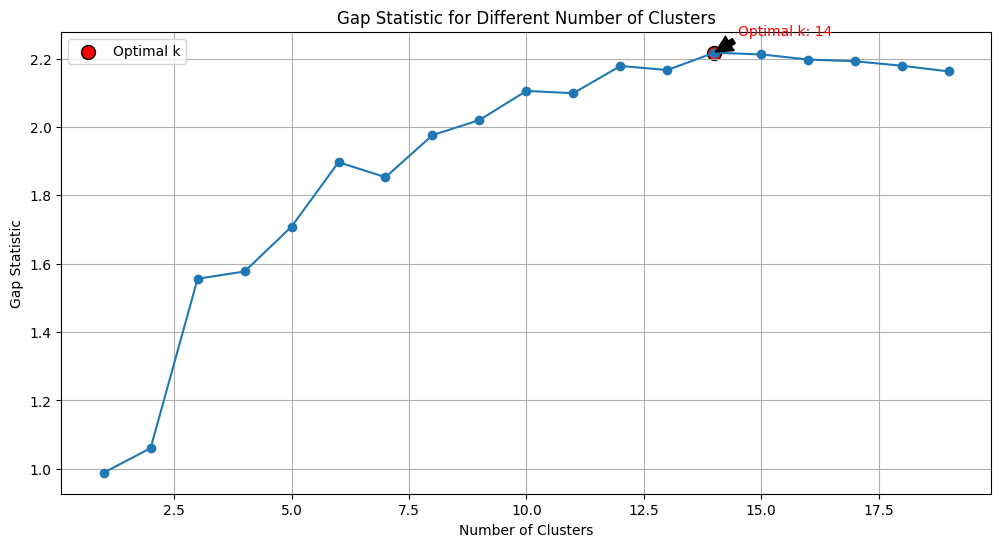

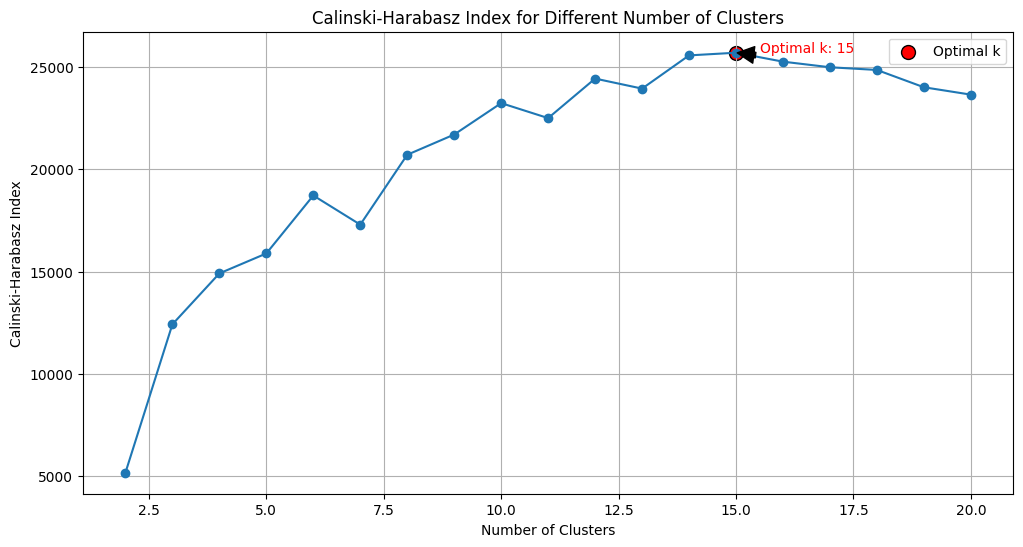

In [ ]:
# Function to calculate and plot the Silhouette Scores
def plot_silhouette_scores(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    optimal_k = np.argmax(silhouette_scores) + 2  # +2 because range starts from 2
    plt.figure(figsize=(12, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.scatter(optimal_k, silhouette_scores[optimal_k - 2], color='red', s=100, edgecolor='black', label='Optimal k')
    plt.annotate(f'Optimal k: {optimal_k}',
                 xy=(optimal_k, silhouette_scores[optimal_k - 2]),
                 xytext=(optimal_k + 0.5, silhouette_scores[optimal_k - 2] - 0.05),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, color='red')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different Number of Clusters')
    plt.grid()
    plt.legend()
    plt.show()

# Function to calculate and plot the Davies-Bouldin Index
def plot_davies_bouldin(X, max_k):
    davies_bouldin_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        davies_bouldin_scores.append(davies_bouldin_score(X, kmeans.labels_))

    optimal_k = np.argmin(davies_bouldin_scores) + 2  # +2 because range starts from 2
    plt.figure(figsize=(12, 6))
    plt.plot(range(2, max_k + 1), davies_bouldin_scores, marker='o')
    plt.scatter(optimal_k, davies_bouldin_scores[optimal_k - 2], color='red', s=100, edgecolor='black', label='Optimal k')
    plt.annotate(f'Optimal k: {optimal_k}',
                 xy=(optimal_k, davies_bouldin_scores[optimal_k - 2]),
                 xytext=(optimal_k + 0.5, davies_bouldin_scores[optimal_k - 2] + 0.05),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, color='red')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Index')
    plt.title('Davies-Bouldin Index for Different Number of Clusters')
    plt.grid()
    plt.legend()
    plt.show()

# Function to calculate and plot the Gap Statistic
def plot_gap_statistic(X, max_k, n_random_samples=10):
    gaps = np.zeros(max_k - 1)
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        dispersion = kmeans.inertia_

        random_data = np.random.rand(*X.shape)
        random_dispersion = []
        for _ in range(n_random_samples):
            kmeans_random = KMeans(n_clusters=k, random_state=42)
            kmeans_random.fit(random_data)
            random_dispersion.append(kmeans_random.inertia_)
        gaps[k - 1] = np.log(np.mean(random_dispersion)) - np.log(dispersion)

    optimal_k = np.argmax(gaps) + 1  # +1 because range starts from 1
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, max_k), gaps, marker='o')
    plt.scatter(optimal_k, gaps[optimal_k - 1], color='red', s=100, edgecolor='black', label='Optimal k')
    plt.annotate(f'Optimal k: {optimal_k}',
                 xy=(optimal_k, gaps[optimal_k - 1]),
                 xytext=(optimal_k + 0.5, gaps[optimal_k - 1] + 0.05),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, color='red')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Gap Statistic')
    plt.title('Gap Statistic for Different Number of Clusters')
    plt.grid()
    plt.legend()
    plt.show()

# Function to calculate and plot the Calinski-Harabasz Index
def plot_calinski_harabasz(X, max_k):
    calinski_harabasz_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        calinski_harabasz_scores.append(calinski_harabasz_score(X, kmeans.labels_))

    optimal_k = np.argmax(calinski_harabasz_scores) + 2  # +2 because range starts from 2
    plt.figure(figsize=(12, 6))
    plt.plot(range(2, max_k + 1), calinski_harabasz_scores, marker='o')
    plt.scatter(optimal_k, calinski_harabasz_scores[optimal_k - 2], color='red', s=100, edgecolor='black', label='Optimal k')
    plt.annotate(f'Optimal k: {optimal_k}',
                 xy=(optimal_k, calinski_harabasz_scores[optimal_k - 2]),
                 xytext=(optimal_k + 0.5, calinski_harabasz_scores[optimal_k - 2] + 5),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, color='red')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Calinski-Harabasz Index')
    plt.title('Calinski-Harabasz Index for Different Number of Clusters')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage
max_k = 20 
X = kernel_pca_data

plot_silhouette_scores(X, max_k)
plot_davies_bouldin(X, max_k)
plot_gap_statistic(X, max_k)
plot_calinski_harabasz(X, max_k)

In [21]:
n = 7

In [ ]:
# Create a DataFrame for kernel PCA results
kernel_pca_df = pd.DataFrame(kernel_pca_data, columns=[f'PC{i+1}' for i in range(kernel_pca_data.shape[1])])

# Combine original data with the K-Means cluster labels
# Create a new DataFrame that includes original features and cluster labels
results_df = corr_red_train.copy()  # Make sure to have a copy of the original data
results_df['Cluster'] = cluster_labels  # Add the cluster labels

# add kernel PCA components to the results DataFrame
results_df = pd.concat([results_df.reset_index(drop=True), kernel_pca_df.reset_index(drop=True)], axis=1)
results_df.head()

,Age,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Rating experience,Purchase Channel [Online],Return [Hotel],Express & Seasonal Pass,Wet Weather [Outdoor/Go Home],Waiting [Normal Rides/Wet Weather],Purchasing [Recommendations & Support],Accessibility,Cluster,PC1,PC2
0,0.25,1,0,1,0,0,0.000000,0.666667,0.533333,0.5,0.25,0.375,0.5625,0.500,0.500,2,0.115688,-0.161700
1,0.25,1,0,1,1,0,0.000000,0.333333,0.600000,0.5,0.55,0.375,0.6250,0.750,0.375,0,0.300229,0.090117
2,0.25,1,0,1,1,1,0.333333,0.666667,0.466667,0.5,0.45,0.375,0.5625,0.500,0.500,0,0.284260,0.112602
3,0.25,1,0,0,1,0,0.000000,0.333333,0.600000,0.0,0.65,0.375,0.4375,0.375,0.375,5,0.101897,0.121478
4,0.25,1,0,1,1,0,0.000000,0.666667,0.533333,1.0,0.65,0.250,0.6875,0.625,0.750,0,0.357180,0.090960


### GMM

In [23]:
n=7

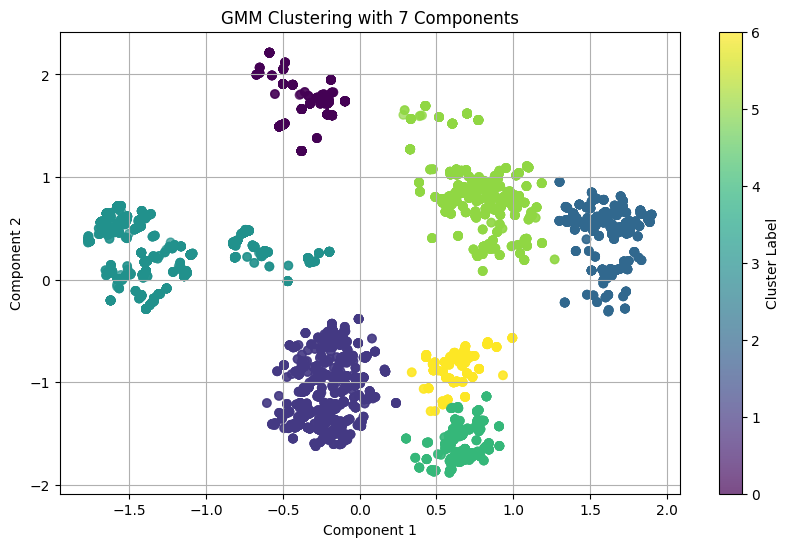

,Age,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Rating experience,Purchase Channel [Online],Return [Hotel],Express & Seasonal Pass,Wet Weather [Outdoor/Go Home],Waiting [Normal Rides/Wet Weather],Purchasing [Recommendations & Support],Accessibility,Cluster
0,0.25,1,0,1,0,0,0.000000,0.666667,0.533333,0.5,0.25,0.375,0.5625,0.500,0.500,6
1,0.25,1,0,1,1,0,0.000000,0.333333,0.600000,0.5,0.55,0.375,0.6250,0.750,0.375,2
2,0.25,1,0,1,1,1,0.333333,0.666667,0.466667,0.5,0.45,0.375,0.5625,0.500,0.500,2
3,0.25,1,0,0,1,0,0.000000,0.333333,0.600000,0.0,0.65,0.375,0.4375,0.375,0.375,5
4,0.25,1,0,1,1,0,0.000000,0.666667,0.533333,1.0,0.65,0.250,0.6875,0.625,0.750,2


In [ ]:
# Step 1: Scale the data (optional, but recommended)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(kernel_pca_data)

# Step 2: Fit GMM to your data
# You can choose the number of components based on your analysis
n_components = n  # You can adjust this based on your analysis
gmm = GaussianMixture(n_components=n_components, random_state=40)
gmm.fit(scaled_data)

# Step 3: Get cluster labels
cluster_labels = gmm.predict(scaled_data)

# Step 4: Visualize GMM clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title(f'GMM Clustering with {n_components} Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
plt.colorbar(label='Cluster Label')
plt.show()

results_df = pd.DataFrame(corr_red_train)  # Assuming this is your original DataFrame
results_df['Cluster'] = cluster_labels
results_df.head()


## Converting to functions

In [25]:
def preprocess_data(data):
    # Start by copying the original data
    red_train = data.copy()

    # Drop specific columns first (as per your list)
    columns_to_drop = [
        'Time enter',
        'Time leave'
    ]

    red_train = red_train.drop(columns=columns_to_drop, errors='ignore')

    red_train['Average tolerable ticket price'] = red_train[[
        'Max tolerable ticket price [Peak]',
        'Max tolerable ticket price [Non-peak]'
    ]].mean(axis=1)

    # 1. Combine Attractions into broader categories (Thrill Rides, Family-friendly, Shows/Entertainment)
    red_train['Attractions appeal [Thrill Rides]'] = red_train[[
        'Attractions appeal [Revenge of the Mummy]',
        'Attractions appeal [Jurassic Park Rapids Adventure]',
        'Attractions appeal [Battlestar Galactica: Human vs. Cylon]',
        'Attractions appeal [Transformers The Ride: The Ultimate 3D Battle]'
        # 'Attractions appeal [Enchanted Airways]',
        # 'Attractions appeal [Canopy Flyer]',
        # "Attractions appeal [Puss In Boots' Giant Journey]"
    ]].mean(axis=1)

    red_train['Attractions appeal [Family-friendly]'] = red_train[[
        'Attractions appeal [Sesame Street Spaghetti Space Chase]',
        'Attractions appeal [Canopy Flyer]',
        'Attractions appeal [Accelerator (Spinning Ride)]',
        'Attractions appeal [Enchanted Airways]',
        "Attractions appeal [Dino-Soarin']",
        "Attractions appeal [Puss In Boots' Giant Journey]",
        'Attractions appeal [Magic Potion Spin (Far Far Away Ferris Wheel)]',
        'Attractions appeal [The Dance for the Magic Beans (Interactive show with Puss in Boots and Kitty Softpaws)]',
        'Attractions appeal [Treasure Hunters (Vintage Car Attraction)]',
        'Attractions appeal [Enchanted Airways]',
        'Attractions appeal [Canopy Flyer]',
        "Attractions appeal [Puss In Boots' Giant Journey]",
        'Attractions appeal [Donkey Live]',
        'Attractions appeal [WaterWorld]',
        'Attractions appeal [Lights, Camera, Action!]',
        'Attractions appeal [Shrek 4-D Adventure]',
        'Attractions appeal [Lights, Camera, Action!]',
        'Attractions appeal [Rhythm Truck 2.0]'
        # ... add other family-friendly attractions ...
    ]].mean(axis=1)

    # red_train['Attractions appeal [Shows/Entertainment]'] = red_train[[
    #     'Attractions appeal [Donkey Live]',
    #     'Attractions appeal [WaterWorld]',
    #     'Attractions appeal [Lights, Camera, Action!]',
    #     'Attractions appeal [Shrek 4-D Adventure]',
    #     'Attractions appeal [Lights, Camera, Action!]'
    # ]].mean(axis=1)

    attraction_columns_to_drop = [
        'Attractions appeal [Revenge of the Mummy]',
        'Attractions appeal [Treasure Hunters (Vintage Car Attraction)]',
        'Attractions appeal [The Dance for the Magic Beans (Interactive show with Puss in Boots and Kitty Softpaws)]',
        'Attractions appeal [Rhythm Truck 2.0]',
        'Attractions appeal [Magic Potion Spin (Far Far Away Ferris Wheel)]',
        'Attractions appeal [Donkey Live]',
        "Attractions appeal [Puss In Boots' Giant Journey]",
        'Attractions appeal [Jurassic Park Rapids Adventure]',
        'Attractions appeal [Battlestar Galactica: Human vs. Cylon]',
        'Attractions appeal [Transformers The Ride: The Ultimate 3D Battle]',
        'Attractions appeal [Sesame Street Spaghetti Space Chase]',
        'Attractions appeal [Canopy Flyer]',
        "Attractions appeal [Dino-Soarin']",
        'Attractions appeal [Enchanted Airways]',
        'Attractions appeal [Accelerator (Spinning Ride)]',
        'Attractions appeal [Lights, Camera, Action!]',
        'Attractions appeal [Shrek 4-D Adventure]',
        'Attractions appeal [WaterWorld]'
    ]
    red_train = red_train.drop(columns=attraction_columns_to_drop, errors='ignore')

    # 2. Combine Ticket Purchase Avenues
    red_train['Purchase Channel [Online]'] = red_train[[
        'Ticket purchase avenues [USS Website]',
        'Ticket purchase avenues [Other Websites]',
        'USS website purchase experience'
    ]].mean(axis=1)

    red_train['Purchase Channel [In-Person/Others]'] = red_train[[
        'Ticket purchase avenues [USS Physical Ticket Counter]',
        'Ticket purchase avenues [Resalers]',
        'Ticket purchase avenues [Staff Tickets]'
    ]].mean(axis=1)

    ticket_columns_to_drop = [
        'Ticket purchase avenues [USS Website]',
        'Ticket purchase avenues [Other Websites]',
        'Ticket purchase avenues [USS Physical Ticket Counter]',
        'Ticket purchase avenues [Resalers]',
        'Ticket purchase avenues [Staff Tickets]'
    ]
    red_train = red_train.drop(columns=ticket_columns_to_drop, errors='ignore')

    # 3. Experience
    red_train['Experience [Food, Retail & Amenities]'] = red_train[[
        'Attractive factors [Food options]',
        'Attractive factors [Types of rides available]',
        'Attractive factors [Gift shops]',
        'Improve experience [Affordable food options]',
        'USS experience rating [Cleanliness of Park and Amenities]',
        'USS experience rating [Staff Friendliness]',
        'USS experience rating [Availability of Rest Areas]',
        'USS experience rating [Quality and Variety of Food/Beverage Options]',
        'USS experience rating [Value for Money (Entrance Fee, Food, etc)]',
        'USS experience rating [Variety and Quality of Souvenir Shops]',
        'USS experience rating [Theme and Atmosphere]',
        'USS experience rating [Presence of Shaded Rest Areas]',
        'Return factors [Enjoyed the overall experience]',
        'Return factors [Staying at a Sentosa resort (E.g. RWS)]',
        'Return factors [Good Food and Dining Options]',
        'Return factors [Good Customer Service]',
        'Return factors [Souvenirs]',
        'Improve experience [Usability of the Universal Studios Singapore App]',
    ]].mean(axis=1)

    red_train['Experience [Entertainment]'] = red_train[[
        'Attractions appeal [Family-friendly]',
        'Attractions appeal [Thrill Rides]',
        # 'Attractions appeal [Shows/Entertainment]',
        'Attractive factors [Types of rides available]',
        'Attractive factors [Special events (e.g. Halloween Horror Night)]',
        'Improve experience [Fun attractions]',
        'Improve experience [Short wait times]',
        'Improve experience [Lack of crowds]',
        'Planning route [Enjoyment of the ride]',
        'Improve queueing [Entertainment in Queuing Area (e.g. Videos, Interactive Elements)]',
        'Improve queueing [Anticipation of Ride]',
        'USS experience rating [Variety of Rides and Attractions]',
        'USS experience rating [Entertainment and Shows (e.g. Rollercoasters, WaterWorld Performance)]',
        'USS experience rating [Crowdedness]',
        'USS experience rating [Special Events and Performances (E.g. Halloween Horror Night)]',
        'Likelihood of return [General]',
        'Return factors [Enjoyed the overall experience]',
        'Return factors [New Rides, Shows and Attractions]',
        'Return factors [Special Occasions (E.g. Halloween Horror Night)]',
        'Likelihood of recommendation'
    ]].mean(axis=1)

    red_train['Experience [Comfort]'] = red_train[[
        'Improve experience [Cooling Weather]',
        'Improve experience [Presence of Shaded Rest Areas]',
        'Improve experience [Lack of crowds]',
        'Improve queueing [Shaded/Cooling Queuing Area]',
        'Improve queueing [Comfortable Seating along Queuing Area]',
        'Improve queueing [Music in the Queuing Area]',
        'Improve queueing [Line moving at a Consistent Pace]',
        'Improve queueing [Restrooms Nearby/Accessible during the Queue]',
        'USS experience rating [Crowdedness]',
        'USS experience rating [Presence of Shaded Rest Areas]',
        'USS experience rating [Weather on the Day of Visit]',
        'USS experience rating [Park Layout and Navigation]',
        'Return factors [Enjoyed the overall experience]'
    ]].mean(axis=1)

    red_train['Return [Hotel]'] = red_train[[
        'Return factors [Staying at a Sentosa resort (E.g. RWS)]'
    ]].mean(axis=1)

    red_train['Queue Management'] = red_train[[
        'USS experience rating [Queue Management]',
        'Improve queueing [Entertainment in Queuing Area (e.g. Videos, Interactive Elements)]',
        'Improve queueing [Anticipation of Ride]',
        'Improve queueing [Shaded/Cooling Queuing Area]',
        'Improve queueing [Comfortable Seating along Queuing Area]',
        'Improve queueing [Music in the Queuing Area]',
        'Improve queueing [Line moving at a Consistent Pace]',
        'Improve queueing [Restrooms Nearby/Accessible during the Queue]',
        'Improve queueing [Positive Prior Experience with Ride]',
        'Wet weather waiting tolerance',
        'Planning route [Expected wait time]',
        'Improve experience [Short wait times]',
        'Improve experience [Lack of crowds]',
        'Planning route [Expected wait time]',
        'USS experience rating [Queue Management]'
    ]].mean(axis=1)

    # 4. Seasonal Pass and Express Pass
    red_train['Express & Seasonal Pass'] = red_train[[
        'Seasonal pass [Frequent visitor to USS]',
        'Seasonal pass [Eligibility during a holiday period]',
        'Seasonal pass [Bundle price]',
        'Express pass purchase',
        'Likelihood of return [Season/Unlimited]'
    ]].mean(axis=1)

    # 8. Wet Weather
    red_train['Wet Weather [Indoor Activities]'] = red_train[[
        'Wet weather [Seek shelter in a restaurant]',
        'Wet weather [Visit indoor attractions]',
        'Wet weather [Visit gift shops/retail areas]'
    ]].mean(axis=1)

    red_train['Wet Weather [Outdoor/Go Home]'] = red_train[[
        'Wet weather [Go home]',
        "Wet weather [Visit outdoor attractions (I don't mind getting wet)]"
    ]].mean(axis=1)

    # 15. Waiting
    red_train['Waiting [Normal Rides/Wet Weather]'] = red_train[[
        'Wet weather waiting tolerance',
        'Ride waiting tolerance',
        'Planning route [Expected wait time]',
        'USS experience rating [Waiting Time]'
    ]].mean(axis=1)

    # 12. Return
    red_train['Return [Enjoyment & Events]'] = red_train[[
        'Return factors [Enjoyed the overall experience]',
        'Return factors [Good Customer Service]',
        'Return factors [Special Occasions (E.g. Halloween Horror Night)]',
        'Return factors [Ticket Discounts and Promotions]',
        'Return factors [School/work Activity]',
        'Return factors [New Rides, Shows and Attractions]',
        'Return factors [Good Food and Dining Options]'
    ]].mean(axis=1)

    red_train['Return [Hotel]'] = red_train[[
        'Return factors [Staying at a Sentosa resort (E.g. RWS)]'
    ]].mean(axis=1)

    # 13. Purchasing factors
    red_train['Purchasing [Ease & Options]'] = red_train[[
        'Purchasing factors [Ease of Navigate USS Website/Booking Platform]',
        'Purchasing factors [Mobile App Integration]',
        'Purchasing factors [Option for Digital Tickets (No printing Required)]',
        'Purchasing factors [Fast Checkout Process]',
        'Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]',
        'Purchasing factors [Clear Pricing Information]',
        'USS website purchase experience'
    ]].mean(axis=1)

    red_train['Purchasing [Perks]'] = red_train[[
        'Purchasing factors [Access to Exclusive Perks (E.g. Fast Pass, VIP Access)]',
        'Purchasing factors [Deals for Tickets (E.g. Multi-Day Ticket Discounts, Family Bundles, Credit Card Offers)]',
        'Purchasing factors [Loyalty Points]',
        'Purchasing factors [Option to Add-On Parking Passes during Purchase]',
        'Return factors [Ticket Discounts and Promotions]'
    ]].mean(axis=1)

    red_train['Purchasing [Recommendations & Support]'] = red_train[[
        'Purchasing factors [Personalised Recommendations based on Visitor Preferences]',
        'Purchasing factors [Live Chat/Support for Booking Assistance]'
    ]].mean(axis=1)

    # 4. Visiting Occasions and Companions
    red_train.loc[:, 'Visiting Occasion [Holiday/Weekend]'] = (
        red_train['Visiting occasion [Public holiday]'].astype(int) |
        red_train['Visiting occasion [School holiday]'].astype(int) |
        red_train['Visiting occasion [Weekends]'].astype(int)
    )

    # Ensure the dtype is correct by casting to int if needed
    red_train['Visiting Occasion [Holiday/Weekend]'] = red_train['Visiting Occasion [Holiday/Weekend]'].astype(int)

    red_train['Visiting Occasion [Special]'] = red_train[[
        'Visiting occasion [Free tickets]',
        'Visiting occasion [Special occasion]',
        'Visiting occasion [School/work event]',
        'Visiting occasion [Special events]',
        'Return factors [School/work Activity]'
    ]].mean(axis=1)

    # 14. Accessibility
    red_train['Accessibility'] = red_train[[
        'Attractive factors [Accessibility]',
        'Improve experience [Accessibility (Ramps, even ground, easy to find seats etc)]',
        'USS experience rating [Accessibility (Wheelchair friendly, etc)]',
        'USS experience rating [Parking Convenience and Accessibility]'
    ]].mean(axis=1)

    accessibility_columns_to_drop = [
        'Attractive factors [Accessibility]',
        'Improve experience [Accessibility (Ramps, even ground, easy to find seats etc)]',
        'USS experience rating [Accessibility (Wheelchair friendly, etc)]',
        'USS experience rating [Parking Convenience and Accessibility]'
    ]
    red_train = red_train.drop(columns=accessibility_columns_to_drop, errors='ignore')

    # Combine the specified columns into a new feature
    red_train['Planning Factors [Combined]'] = red_train[[
        'Planning route [Expected wait time]',
        'Planning route [Closeness of ride to current location]',
        "Planning route [Prioritisation of Group's Preferences (e.g. going with your family and choosing to go to the rides that your younger siblings prefer)]"
    ]].mean(axis=1)  # Use sum(axis=1) if you prefer summing

    # Optionally drop the original columns if they are no longer needed
    columns_to_drop = [
        'Planning route [Expected wait time]',
        'Planning route [Closeness of ride to current location]',
        "Planning route [Prioritisation of Group's Preferences (e.g. going with your family and choosing to go to the rides that your younger siblings prefer)]"
    ]
    red_train = red_train.drop(columns=columns_to_drop, errors='ignore')

    ###
    express_seasonal_pass_columns_to_drop = [
        'Seasonal pass [Frequent visitor to USS]',
        'Seasonal pass [Eligibility during a holiday period]',
        'Seasonal pass [Bundle price]',
        'Express pass purchase',
        'Likelihood of return [Season/Unlimited]'
    ]
    red_train = red_train.drop(columns=express_seasonal_pass_columns_to_drop, errors='ignore')

    wet_weather_columns_to_drop = [
        'Wet weather [Seek shelter in a restaurant]',
        'Wet weather [Visit indoor attractions]',
        'Wet weather [Visit gift shops/retail areas]',
        'Wet weather [Go home]',
        "Wet weather [Visit outdoor attractions (I don't mind getting wet)]"
    ]
    red_train = red_train.drop(columns=wet_weather_columns_to_drop, errors='ignore')

    waiting_columns_to_drop = [
        'Wet weather waiting tolerance',
        'Ride waiting tolerance',
        'USS experience rating [Waiting Time]',
    ]
    red_train = red_train.drop(columns=waiting_columns_to_drop, errors='ignore')

    return_columns_to_drop = [
        'Return factors [Enjoyed the overall experience]',
        'Return factors [Good Customer Service]',
        'Return factors [Special Occasions (E.g. Halloween Horror Night)]',
        'Return factors [Ticket Discounts and Promotions]',
        'Return factors [School/work Activity]',
        'Return factors [Staying at a Sentosa resort (E.g. RWS)]',
        'Return factors [Souvenirs]',
        'Likelihood of return [General]',
        'Likelihood of recommendation',
        'Return factors [New Rides, Shows and Attractions]',
        'Return factors [Good Food and Dining Options]'
    ]
    red_train = red_train.drop(columns=return_columns_to_drop, errors='ignore')

    purchasing_columns_to_drop = [
        'Purchasing factors [Ease of Navigate USS Website/Booking Platform]',
        'Purchasing factors [Mobile App Integration]',
        'Purchasing factors [Option for Digital Tickets (No printing Required)]',
        'Purchasing factors [Fast Checkout Process]',
        'Purchasing factors [Access to Exclusive Perks (E.g. Fast Pass, VIP Access)]',
        'Purchasing factors [Deals for Tickets (E.g. Multi-Day Ticket Discounts, Family Bundles, Credit Card Offers)]',
        'Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]',
        'Purchasing factors [Clear Refund and Exchange Policies]',
        'Purchasing factors [Loyalty Points]',
        'Purchasing factors [Clear Pricing Information]',
        'Purchasing factors [Personalised Recommendations based on Visitor Preferences]',
        'Purchasing factors [Live Chat/Support for Booking Assistance]',
        'Purchasing factors [Option to Add-On Parking Passes during Purchase]',
    ]
    red_train = red_train.drop(columns=purchasing_columns_to_drop, errors='ignore')

    occasion_columns_to_drop = [
        'Visiting occasion [Free tickets]',
        'Visiting occasion [Public holiday]',
        'Visiting occasion [School holiday]',
        'Visiting occasion [School/work event]',
        'Visiting occasion [Special events]',
        'Visiting occasion [Special occasion]',
        'Visiting occasion [Weekdays]',
        'Visiting occasion [Weekends]'
    ]
    red_train = red_train.drop(columns=occasion_columns_to_drop, errors='ignore')

    to_drop = [
        'Max tolerable ticket price [Peak]',
        'Max tolerable ticket price [Non-peak]',
        'Attractions appeal [Revenge of the Mummy]',
        'Attractions appeal [Treasure Hunters (Vintage Car Attraction)]',
        'Attractions appeal [The Dance for the Magic Beans (Interactive show with Puss in Boots and Kitty Softpaws)]',
        'Attractions appeal [Rhythm Truck 2.0]',
        'Attractions appeal [Magic Potion Spin (Far Far Away Ferris Wheel)]',
        'Attractions appeal [Donkey Live]',
        "Attractions appeal [Puss In Boots' Giant Journey]",
        'Attractions appeal [Jurassic Park Rapids Adventure]',
        'Attractions appeal [Battlestar Galactica: Human vs. Cylon]',
        'Attractions appeal [Transformers The Ride: The Ultimate 3D Battle]',
        'Attractions appeal [Sesame Street Spaghetti Space Chase]',
        'Attractions appeal [Canopy Flyer]',
        "Attractions appeal [Dino-Soarin']",
        'Attractions appeal [Enchanted Airways]',
        'Attractions appeal [Accelerator (Spinning Ride)]',
        'Attractions appeal [Lights, Camera, Action!]',
        'Attractions appeal [Shrek 4-D Adventure]',
        'Attractions appeal [WaterWorld]',
        'Ticket purchase avenues [USS Website]',
        'Ticket purchase avenues [Other Websites]',
        'Ticket purchase avenues [USS Physical Ticket Counter]',
        'Ticket purchase avenues [Resalers]',
        'Ticket purchase avenues [Staff Tickets]',
        'Attractive factors [Food options]',
        'Attractive factors [Types of rides available]',
        'Attractive factors [Gift shops]',
        'Improve experience [Affordable food options]',
        'USS experience rating [Cleanliness of Park and Amenities]',
        'USS experience rating [Staff Friendliness]',
        'USS experience rating [Availability of Rest Areas]',
        'USS experience rating [Quality and Variety of Food/Beverage Options]',
        'USS experience rating [Value for Money (Entrance Fee, Food, etc)]',
        'USS experience rating [Variety and Quality of Souvenir Shops]',
        'USS experience rating [Theme and Atmosphere]',
        'USS experience rating [Presence of Shaded Rest Areas]',
        'Return factors [Enjoyed the overall experience]',
        'Return factors [Staying at a Sentosa resort (E.g. RWS)]',
        'Return factors [Good Food and Dining Options]',
        'Return factors [Good Customer Service]',
        'Return factors [Souvenirs]',
        'Improve experience [Usability of the Universal Studios Singapore App]',
        # 'Attractions appeal [Family-friendly]',
        # 'Attractions appeal [Thrill Rides]',
        # 'Attractions appeal [Shows/Entertainment]',
        'Attractive factors [Special events (e.g. Halloween Horror Night)]',
        'Improve experience [Fun attractions]',
        'Improve experience [Short wait times]',
        'Improve experience [Lack of crowds]',
        'Planning route [Enjoyment of the ride]',
        'Improve queueing [Entertainment in Queuing Area (e.g. Videos, Interactive Elements)]',
        'Improve queueing [Anticipation of Ride]',
        'USS experience rating [Variety of Rides and Attractions]',
        'USS experience rating [Entertainment and Shows (e.g. Rollercoasters, WaterWorld Performance)]',
        'USS experience rating [Crowdedness]',
        'USS experience rating [Special Events and Performances (E.g. Halloween Horror Night)]',
        'Likelihood of return [General]',
        'Return factors [New Rides, Shows and Attractions]',
        'Return factors [Special Occasions (E.g. Halloween Horror Night)]',
        'Likelihood of recommendation',
        'Improve experience [Cooling Weather]',
        'Improve experience [Presence of Shaded Rest Areas]',
        'Improve experience [Lack of crowds]',
        'Improve queueing [Shaded/Cooling Queuing Area]',
        'Improve queueing [Comfortable Seating along Queuing Area]',
        'Improve queueing [Music in the Queuing Area]',
        'Improve queueing [Line moving at a Consistent Pace]',
        'Improve queueing [Restrooms Nearby/Accessible during the Queue]',
        'USS experience rating [Crowdedness]',
        'USS experience rating [Presence of Shaded Rest Areas]',
        'USS experience rating [Weather on the Day of Visit]',
        'USS experience rating [Park Layout and Navigation]',
        'Improve queueing [Positive Prior Experience with Ride]',
        'USS experience rating [Queue Management]',
        'USS website purchase experience'
    ]

    red_train = red_train.drop(columns=to_drop, errors='ignore')

    red_train = red_train.drop(columns=[
    'Experience [Comfort]',
    'Return [Enjoyment & Events]',
    'Experience [Entertainment]',
    'Planning Factors [Combined]',
    'Purchasing [Ease & Options]',
    'Queue Management',
    'Experience [Food, Retail & Amenities]',
    'Purchasing [Perks]',
    'Visiting Occasion [Special]',
    'Wet Weather [Indoor Activities]',
    'Gender',
    'Purchase Channel [In-Person/Others]',
    'Visiting Occasion [Holiday/Weekend]',
    'Attractions appeal [Thrill Rides]',
    'Attractions appeal [Family-friendly]',
    'Average tolerable ticket price'
    ])

    return red_train

In [26]:
def average_feature_values_by_cluster(results_df, n_clusters):
    """
    Calculate and print average feature values by cluster from K-Fold results.

    Parameters:
    - results_df: DataFrame with cluster assignments.
    - n_clusters: int, number of clusters.

    Returns:
    - avg_k_fold_df: DataFrame with average feature values for each cluster.
    """

    # Step 4: Average feature values by cluster from K-Fold
    avg_k_fold_df = results_df.groupby('Cluster').mean().round(2)  # Round to 2 decimal places

    # Debug: Print the aggregated DataFrame to compare outputs
    print("Aggregated Feature Values by Cluster:")
    print(avg_k_fold_df)

    # Debug: Print the clusters in avg_k_fold_df and the range of n_clusters
    print("\nClusters in avg_k_fold_df:")
    print(avg_k_fold_df.index)

    print("\nExpected Clusters (from n_clusters):")
    print(list(range(n_clusters)))

    # Print the profile for each cluster
    for cluster in range(n_clusters):
        print(f"\nCluster {cluster} Profile:")
        if cluster in avg_k_fold_df.index:  # Check if cluster exists in the average DataFrame
            cluster_profile = avg_k_fold_df.loc[cluster]
            for feature in cluster_profile.index:
                print(f"{feature}: {cluster_profile[feature]:.2f}")
        else:
            print(f"Cluster {cluster} does not exist in the current K-Fold iteration.")

    # Print out the DataFrame for clarity
    print("\nFinal Aggregated DataFrame:")
    return avg_k_fold_df

## K-Means Clustering

### Modelling

train_data, val_data : untouched original

corr_red_train, corr_red_val : preprocessed

1. Preprocess validation data

In [27]:
# preprocess validation data
corr_red_val = preprocess_data(val_data)
corr_red_val

,Age,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Rating experience,Purchase Channel [Online],Return [Hotel],Express & Seasonal Pass,Wet Weather [Outdoor/Go Home],Waiting [Normal Rides/Wet Weather],Purchasing [Recommendations & Support],Accessibility
0,0.25,1,0,1,1,0,0.000000,0.333333,0.600000,0.75,0.85,0.625,0.5000,1.000,0.5000
1,0.25,1,0,0,1,1,0.000000,0.333333,0.533333,1.00,0.65,0.625,0.5625,0.750,0.6250
2,0.25,1,0,1,1,1,0.000000,0.666667,0.666667,0.75,0.40,0.375,0.6250,1.000,0.8750
3,0.00,1,0,0,1,0,0.000000,0.666667,0.533333,0.75,0.30,0.125,0.5625,0.750,0.3750
4,0.25,1,0,0,1,1,0.000000,0.666667,0.533333,1.00,0.70,0.000,0.6250,1.000,0.3125
5,1.00,0,1,1,0,0,0.333333,0.666667,0.666667,0.50,0.95,0.250,0.6875,0.375,0.8750
6,1.00,1,0,1,0,0,0.333333,0.666667,0.666667,0.50,0.75,0.375,0.6875,0.750,0.3125
7,0.25,1,0,1,1,1,0.000000,0.666667,0.000000,1.00,0.50,0.500,0.5000,0.500,0.8125
8,0.25,1,0,1,1,1,0.000000,1.000000,0.600000,0.75,0.95,0.250,0.5000,0.875,0.6875
9,0.25,1,0,0,1,0,0.333333,0.666667,0.666667,0.75,0.60,0.625,0.4375,1.000,0.3125


2. Perform modelling (k-means clustering)

In [ ]:
# Step 1: Standard Scaling
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)

# Convert scaled data back to DataFrames for compatibility with `preprocess_data`
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns)
val_data_scaled_df = pd.DataFrame(val_data_scaled, columns=val_data.columns)

# Step 2: Apply additional data preprocessing
corr_red_train = preprocess_data(train_data_scaled_df)
corr_red_val = preprocess_data(val_data_scaled_df)

# Step 3: Dimensionality Reduction with Kernel PCA
kernel_pca = KernelPCA(kernel='rbf', n_components=10)  # Adjust n_components as needed
train_data_kpca = kernel_pca.fit_transform(corr_red_train)
val_data_kpca = kernel_pca.transform(corr_red_val)

# Step 4: K-Folds Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust number of splits as needed

# Store the clustering results from each fold
cluster_labels_per_fold = []

for train_index, test_index in kf.split(train_data_kpca):
    # Split the data
    X_train, X_test = train_data_kpca[train_index], train_data_kpca[test_index]

    # Fit KMeans Clustering on the training data
    kmeans = KMeans(n_clusters=7, random_state=42)  # Adjust as needed
    kmeans.fit(X_train)

    # Predict cluster labels for the test fold
    test_labels = kmeans.predict(X_test)
    cluster_labels_per_fold.append(test_labels)

# Combine all fold results into a single array (you can modify how you aggregate this if needed)
# Here we're just concatenating them for demonstration
all_train_labels = np.concatenate(cluster_labels_per_fold)

# Step 5: Predict Cluster Labels for the entire training data
train_labels = kmeans.predict(train_data_kpca)

# Step 6: Combine results with cluster labels
train_results = pd.DataFrame(train_data_kpca, columns=[f'PC{i+1}' for i in range(train_data_kpca.shape[1])])
train_results['Cluster'] = train_labels

val_results = pd.DataFrame(val_data_kpca, columns=[f'PC{i+1}' for i in range(val_data_kpca.shape[1])])
val_labels = kmeans.predict(val_data_kpca)
val_results['Cluster'] = val_labels

# Step 7: Apply MinMaxScaler to features only (excluding the 'Cluster' column)
minmax_scaler = MinMaxScaler()

# Scale all feature columns except for the 'Cluster' label
train_features_scaled = minmax_scaler.fit_transform(np.abs(train_results.drop(columns=['Cluster'])))
val_features_scaled = minmax_scaler.transform(np.abs(val_results.drop(columns=['Cluster'])))

# Combine scaled features back with the cluster labels
train_results_scaled_df = pd.DataFrame(train_features_scaled, columns=train_results.columns[:-1])  # All except 'Cluster'
train_results_scaled_df['Cluster'] = train_labels

val_results_scaled_df = pd.DataFrame(val_features_scaled, columns=val_results.columns[:-1])  # All except 'Cluster'
val_results_scaled_df['Cluster'] = val_labels

# Optionally: Review the results
print("Scaled Training Results Head:\n", train_results_scaled_df.head())
print("Scaled Validation Results Head:\n", val_results_scaled_df.head())

Scaled Training Results Head:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.149125  0.105965  0.319510  0.854159  0.022025  0.302845  0.381360   
1  0.291350  0.474949  0.334405  0.158874  0.686549  0.182266  0.146833   
2  0.222226  0.473415  0.428276  0.020295  0.174222  0.482983  0.485826   
3  0.023275  0.097509  0.379738  0.403190  0.400440  0.746259  0.017086   
4  0.530671  0.708648  0.259002  0.075620  0.307539  0.436399  0.088108   

        PC8       PC9      PC10  Cluster  
0  0.041910  0.355643  0.156946        0  
1  0.392649  0.222541  0.425575        0  
2  0.013189  0.356727  0.024081        6  
3  0.684327  0.425856  0.026558        1  
4  0.128864  0.066177  0.112997        0  
Scaled Validation Results Head:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.303126  0.544315  0.079174  0.006692  0.408778  0.300875  0.031821   
1  0.261431  0.341161  0.246702  0.545304  0.087938  0.008330  0.444352   
2 

In [ ]:
# Step 1: Attach the cluster labels to the reduced datasets
train_labels_df = pd.DataFrame(train_labels, columns=['Cluster'])
val_labels_df = pd.DataFrame(val_labels, columns=['Cluster'])

corr_red_train_with_labels = pd.concat([corr_red_train.reset_index(drop=True), train_labels_df], axis=1)
corr_red_val_with_labels = pd.concat([corr_red_val.reset_index(drop=True), val_labels_df], axis=1)

# Step 2: Apply MinMax scaling to all columns except the 'Cluster' column
minmax_scaler = MinMaxScaler()

# Scale all columns except 'Cluster' for the training data
train_features = corr_red_train_with_labels.drop(columns=['Cluster'])
train_features_scaled = minmax_scaler.fit_transform(train_features)

# Reassemble the DataFrame with the scaled features and the original 'Cluster' column
corr_red_train_scaled_df = pd.DataFrame(train_features_scaled, columns=train_features.columns)
corr_red_train_scaled_df['Cluster'] = train_labels_df.values

# Repeat for the validation data
val_features = corr_red_val_with_labels.drop(columns=['Cluster'])
val_features_scaled = minmax_scaler.transform(val_features)

# Reassemble the validation DataFrame with scaled features and the original 'Cluster' column
corr_red_val_scaled_df = pd.DataFrame(val_features_scaled, columns=val_features.columns)
corr_red_val_scaled_df['Cluster'] = val_labels_df.values

# Check the results
print("corr_red_train_scaled_df:\n", corr_red_train_scaled_df.head())
print("corr_red_val_scaled_df:\n", corr_red_val_scaled_df.head())

corr_red_train_scaled_df:
     Age  Tourist/Local  USS companion [Children]  USS companion [Family]  \
0  0.25            1.0                       0.0                     1.0   
1  0.25            1.0                       0.0                     1.0   
2  0.25            1.0                       0.0                     1.0   
3  0.25            1.0                       0.0                     0.0   
4  0.25            1.0                       0.0                     1.0   

   USS companion [Friends]  USS companion [Significant other]  \
0                      0.0                                0.0   
1                      1.0                                0.0   
2                      1.0                                1.0   
3                      1.0                                0.0   
4                      1.0                                0.0   

   Visiting frequency  Rating experience  Purchase Channel [Online]  \
0            0.000000           0.666667              

In [30]:
corr_red_train_scaled_df

,Age,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Rating experience,Purchase Channel [Online],Return [Hotel],Express & Seasonal Pass,Wet Weather [Outdoor/Go Home],Waiting [Normal Rides/Wet Weather],Purchasing [Recommendations & Support],Accessibility,Cluster
0,0.25,1.0,0.0,1.0,0.0,0.0,0.000000,0.666667,0.427331,0.50,0.234260,0.37294,0.578978,0.422548,0.486877,0
1,0.25,1.0,0.0,1.0,1.0,0.0,0.000000,0.333333,0.499857,0.50,0.528047,0.37706,0.627952,0.715490,0.392947,0
2,0.25,1.0,0.0,1.0,1.0,1.0,0.333333,0.666667,0.354805,0.50,0.418959,0.37706,0.558494,0.430981,0.525825,6
3,0.25,1.0,0.0,0.0,1.0,0.0,0.000000,0.333333,0.499857,0.00,0.608656,0.37706,0.418104,0.284510,0.366701,1
4,0.25,1.0,0.0,1.0,1.0,0.0,0.000000,0.666667,0.427331,1.00,0.628137,0.25000,0.712391,0.577452,0.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7233,0.00,0.0,0.0,1.0,0.0,0.0,0.000000,0.666667,0.645195,0.00,0.412358,0.49588,0.637548,0.853529,0.446263,3
7234,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.217578,0.25,0.297787,0.12706,0.415486,0.569019,0.446263,3
7235,0.25,0.0,0.0,1.0,1.0,0.0,0.000000,0.666667,0.427331,0.50,0.604089,0.37706,0.493097,0.430981,0.566439,0
7236,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.427331,0.50,0.222694,0.37706,0.572150,0.430981,0.393368,3


In [31]:
# average k-fold validation
avg_k_fold_train_df_km = average_feature_values_by_cluster(corr_red_train_scaled_df, n_clusters=n)
avg_k_fold_train_df_km

Aggregated Feature Values by Cluster:
          Age  Tourist/Local  USS companion [Children]  \
Cluster                                                  
0        0.48           0.92                      0.00   
1        0.24           0.95                      0.00   
2        0.55           0.58                      0.46   
3        0.04           0.00                      0.00   
4        0.52           0.01                      0.00   
5        0.72           0.96                      0.00   
6        0.28           0.59                      0.04   

         USS companion [Family]  USS companion [Friends]  \
Cluster                                                    
0                          1.00                     0.53   
1                          0.00                     0.76   
2                          0.19                     0.32   
3                          0.31                     0.05   
4                          0.06                     0.53   
5                  

,Age,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Rating experience,Purchase Channel [Online],Return [Hotel],Express & Seasonal Pass,Wet Weather [Outdoor/Go Home],Waiting [Normal Rides/Wet Weather],Purchasing [Recommendations & Support],Accessibility
Cluster,,,,,,,,,,,,,,,
0,0.48,0.92,0.00,1.00,0.53,0.00,0.02,0.62,0.38,0.58,0.50,0.38,0.50,0.48,0.55
1,0.24,0.95,0.00,0.00,0.76,0.00,0.00,0.61,0.41,0.60,0.50,0.35,0.48,0.49,0.51
2,0.55,0.58,0.46,0.19,0.32,0.67,0.01,0.56,0.40,0.53,0.45,0.35,0.47,0.52,0.55
3,0.04,0.00,0.00,0.31,0.05,0.00,0.00,0.59,0.26,0.18,0.36,0.39,0.50,0.57,0.42
4,0.52,0.01,0.00,0.06,0.53,0.00,0.01,0.27,0.26,0.41,0.52,0.36,0.37,0.39,0.56
5,0.72,0.96,0.00,0.07,0.02,0.00,0.01,0.45,0.31,0.40,0.39,0.28,0.34,0.33,0.45
6,0.28,0.59,0.04,0.41,0.41,0.24,0.43,0.64,0.33,0.42,0.55,0.42,0.50,0.60,0.49


In [32]:
avg_k_fold_val_df_km = average_feature_values_by_cluster(corr_red_val_scaled_df, n_clusters=n)
avg_k_fold_val_df_km

Aggregated Feature Values by Cluster:
          Age  Tourist/Local  USS companion [Children]  \
Cluster                                                  
0        0.48           0.90                      0.00   
1        0.21           1.00                      0.00   
2        0.46           0.86                      0.29   
6        0.40           1.00                      0.00   

         USS companion [Family]  USS companion [Friends]  \
Cluster                                                    
0                          1.00                     0.40   
1                          0.00                     1.00   
2                          0.57                     0.71   
6                          0.60                     0.80   

         USS companion [Significant other]  Visiting frequency  \
Cluster                                                          
0                                     0.00                0.00   
1                                     0.00            

,Age,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Rating experience,Purchase Channel [Online],Return [Hotel],Express & Seasonal Pass,Wet Weather [Outdoor/Go Home],Waiting [Normal Rides/Wet Weather],Purchasing [Recommendations & Support],Accessibility
Cluster,,,,,,,,,,,,,,,
0,0.48,0.90,0.00,1.00,0.40,0.00,0.00,0.67,0.39,0.62,0.58,0.43,0.57,0.54,0.46
1,0.21,1.00,0.00,0.00,1.00,0.00,0.00,0.44,0.18,0.42,0.50,0.23,0.53,0.41,0.51
2,0.46,0.86,0.29,0.57,0.71,0.71,0.05,0.62,0.41,0.86,0.65,0.34,0.56,0.69,0.65
6,0.40,1.00,0.00,0.60,0.80,0.00,0.40,0.73,0.47,0.80,0.66,0.48,0.66,0.74,0.47


---

### Test data

In [33]:
test_data

,Age,Gender,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Visiting occasion [Free tickets],Visiting occasion [Public holiday],...,"Purchasing factors [Access to Exclusive Perks (E.g. Fast Pass, VIP Access)]","Purchasing factors [Deals for Tickets (E.g. Multi-Day Ticket Discounts, Family Bundles, Credit Card Offers)]",Purchasing factors [Loyalty Points],Purchasing factors [Clear Pricing Information],"Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]",Purchasing factors [Clear Refund and Exchange Policies],Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase]
0,0.25,1,1,0,0,1,0,0.000000,0,0,...,0.25,0.50,0.00,0.50,0.50,0.25,0.50,0.50,0.00,0.50
1,0.25,1,1,0,1,1,0,0.000000,0,1,...,0.75,0.75,0.75,1.00,0.75,1.00,1.00,1.00,1.00,1.00
2,0.25,0,1,0,1,1,1,0.000000,0,0,...,0.50,0.50,0.25,0.50,0.50,0.50,0.50,0.50,0.25,0.50
3,0.75,0,1,0,0,0,1,0.333333,0,0,...,0.50,0.25,0.75,0.75,0.50,0.75,1.00,0.00,0.00,0.00
4,0.25,1,1,0,1,1,0,0.000000,0,0,...,0.50,0.75,0.25,0.75,0.75,0.75,0.75,0.25,0.25,0.00
5,0.25,1,1,0,0,1,1,0.000000,0,0,...,0.25,0.75,0.25,0.75,0.75,0.75,0.75,0.25,0.25,0.25
6,0.25,0,1,0,0,1,0,0.000000,0,0,...,1.00,1.00,0.50,1.00,0.50,0.50,1.00,1.00,0.50,0.50
7,0.00,0,1,0,1,1,1,0.666667,0,0,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
8,0.25,1,1,0,1,1,0,0.000000,0,1,...,1.00,1.00,0.50,1.00,1.00,1.00,1.00,0.00,0.50,0.50
9,0.75,1,1,0,1,0,0,0.333333,0,0,...,0.25,0.25,0.25,0.00,0.25,0.25,0.00,0.00,0.25,0.25


In [ ]:
# Step 1: Standard Scaling for Test Data (using the same scaler fitted on train_data)
test_data_scaled = scaler.transform(test_data)  # Use the same StandardScaler fitted on train_data

# Convert scaled data back to DataFrame for compatibility with preprocess_data
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns)

# Step 2: Apply additional data preprocessing (using the same preprocess_data function)
corr_red_test = preprocess_data(test_data_scaled_df)  # Use the same preprocess_data function

# Step 3: Dimensionality Reduction with Kernel PCA (using the same fitted KernelPCA)
test_data_kpca = kernel_pca.transform(corr_red_test)  # Use the fitted KernelPCA

# Step 4: Predict Cluster Labels for the Test Data (using the same fitted KMeans)
test_labels = kmeans.predict(test_data_kpca)  # Use the trained KMeans model

# Step 5: Apply MinMax Scaling to the Test Data (excluding the 'Cluster' column)
minmax_scaler = MinMaxScaler()

# Scale all feature columns (excluding 'Cluster')
test_features_scaled = minmax_scaler.fit_transform(test_data_kpca)  # Fit the scaler only on the test data

# Combine the scaled features with the cluster labels
test_results_scaled_df = pd.DataFrame(test_features_scaled, columns=[f'PC{i+1}' for i in range(test_data_kpca.shape[1])])
test_results_scaled_df['Cluster'] = test_labels  # Attach the cluster labels

# Optionally: Review the scaled test results
print("Scaled Test Results Head:\n", test_results_scaled_df.head())

# Check the range of scaled features to confirm they are between 0 and 1
print("Min and Max of scaled test data:", test_features_scaled.min(), test_features_scaled.max())

Scaled Test Results Head:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.576785  0.786563  0.093295  0.176041  0.402641  0.850086  0.107063   
1  0.723285  0.276284  0.520131  0.689168  0.610753  0.676494  0.284043   
2  0.479150  0.432245  0.734221  0.449538  0.658838  0.844621  0.951350   
3  0.597211  0.853132  0.971716  0.357755  0.319516  0.826150  0.870898   
4  0.454691  0.325591  0.391520  0.682958  0.552581  0.832258  0.440750   

        PC8       PC9      PC10  Cluster  
0  0.574666  0.253940  0.704459        1  
1  0.390825  0.340089  0.068856        0  
2  0.948281  0.133818  0.517566        2  
3  0.688671  0.521478  0.597331        2  
4  0.681074  0.144546  0.939912        0  
Min and Max of scaled test data: 0.0 1.0000000000000002


In [ ]:
# Step 1: Attach the cluster labels to the reduced test dataset
test_labels_df = pd.DataFrame(test_labels, columns=['Cluster'])

# Combine the test data (scaled and transformed through KernelPCA) with cluster labels
corr_red_test_with_labels = pd.concat([corr_red_test.reset_index(drop=True), test_labels_df], axis=1)

# Step 2: Apply MinMax scaling to all columns except the 'Cluster' column
minmax_scaler = MinMaxScaler()

# Scale all feature columns except 'Cluster' for the test data
test_features = corr_red_test_with_labels.drop(columns=['Cluster'])
test_features_scaled = minmax_scaler.fit_transform(test_features)

# Reassemble the DataFrame with the scaled features and the original 'Cluster' column
corr_red_test_scaled_df = pd.DataFrame(test_features_scaled, columns=test_features.columns)
corr_red_test_scaled_df['Cluster'] = test_labels_df.values  # Adding back the 'Cluster' labels

# Check the results
print("Scaled Test Data:\n", corr_red_test_scaled_df.head())

# Optionally, confirm that the values are within the range [0, 1]
print("Min and Max of scaled test data:", test_features_scaled.min(), test_features_scaled.max())

Scaled Test Data:
     Age  Tourist/Local  USS companion [Children]  USS companion [Family]  \
0  0.25            1.0                       0.0                     0.0   
1  0.25            1.0                       0.0                     1.0   
2  0.25            1.0                       0.0                     1.0   
3  0.75            1.0                       0.0                     0.0   
4  0.25            1.0                       0.0                     1.0   

   USS companion [Friends]  USS companion [Significant other]  \
0                      1.0                                0.0   
1                      1.0                                0.0   
2                      1.0                                1.0   
3                      0.0                                1.0   
4                      1.0                                0.0   

   Visiting frequency  Rating experience  Purchase Channel [Online]  \
0                 0.0           0.666667                   0.0

In [36]:
avg_k_fold_test_df_km = average_feature_values_by_cluster(corr_red_test_scaled_df, n_clusters=n)
avg_k_fold_test_df_km

Aggregated Feature Values by Cluster:
          Age  Tourist/Local  USS companion [Children]  \
Cluster                                                  
0        0.34            1.0                      0.00   
1        0.21            1.0                      0.00   
2        0.38            1.0                      0.17   
3        0.00            0.0                      0.00   
6        0.30            0.8                      0.00   

         USS companion [Family]  USS companion [Friends]  \
Cluster                                                    
0                          1.00                     0.91   
1                          0.00                     1.00   
2                          0.67                     0.83   
3                          1.00                     0.00   
6                          0.80                     0.80   

         USS companion [Significant other]  Visiting frequency  \
Cluster                                                          
0 

,Age,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Rating experience,Purchase Channel [Online],Return [Hotel],Express & Seasonal Pass,Wet Weather [Outdoor/Go Home],Waiting [Normal Rides/Wet Weather],Purchasing [Recommendations & Support],Accessibility
Cluster,,,,,,,,,,,,,,,
0,0.34,1.0,0.00,1.00,0.91,0.00,0.00,0.64,0.38,0.41,0.69,0.29,0.50,0.53,0.56
1,0.21,1.0,0.00,0.00,1.00,0.00,0.08,0.56,0.28,0.46,0.60,0.26,0.40,0.46,0.51
2,0.38,1.0,0.17,0.67,0.83,0.83,0.08,0.67,0.55,0.42,0.55,0.34,0.23,0.23,0.29
3,0.00,0.0,0.00,1.00,0.00,0.00,0.00,0.33,0.62,0.75,0.42,0.43,0.61,1.00,0.47
6,0.30,0.8,0.00,0.80,0.80,0.20,0.60,0.53,0.65,0.60,0.60,0.35,0.58,0.35,0.23


# Evaluating

**Average centroid similarity across folds**

In [ ]:
## TRAIN & VALIDATION ##

# Initialize lists to store validation centroid similarities
val_centroid_similarities = []

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
previous_val_fold_centroids = None

for train_index, val_index in kf.split(train_data_kpca):
    # Split the data for this fold
    X_train, X_val = train_data_kpca[train_index], train_data_kpca[val_index]

    # Fit KMeans Clustering on the validation fold
    kmeans = KMeans(n_clusters=6, random_state=42)
    kmeans.fit(X_val)

    # Step: Centroid Similarity for Consistency Across Validation Folds
    if previous_val_fold_centroids is not None:
        current_val_centroids = kmeans.cluster_centers_
        # Calculate distance to the closest centroid from the previous validation fold
        _, val_distances = pairwise_distances_argmin_min(current_val_centroids, previous_val_fold_centroids)
        val_centroid_similarities.append(np.mean(val_distances))  # Average distance as a similarity measure
    previous_val_fold_centroids = kmeans.cluster_centers_

# Calculate average Centroid Similarity across validation folds
avg_val_centroid_similarity = np.mean(val_centroid_similarities) if val_centroid_similarities else None

print("Average Centroid Similarity across validation folds - TRAIN & VAL (Lower is better):", round(avg_val_centroid_similarity, 2))

Average Centroid Similarity across validation folds - TRAIN & VAL (Lower is better): 0.21


In [ ]:
## TRAIN & TEST ##

# Initialize lists to store results
centroid_similarities = []

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
previous_fold_centroids = None

for train_index, test_index in kf.split(train_data_kpca):
    # Split the data for this fold
    X_train, X_test = train_data_kpca[train_index], train_data_kpca[test_index]

    # Fit KMeans Clustering on the training fold
    kmeans = KMeans(n_clusters=6, random_state=42)
    kmeans.fit(X_train)

    # Step: Centroid Similarity for Consistency Across Folds
    if previous_fold_centroids is not None:
        current_centroids = kmeans.cluster_centers_
        # Calculate distance to the closest centroid from the previous fold
        _, distances = pairwise_distances_argmin_min(current_centroids, previous_fold_centroids)
        centroid_similarities.append(np.mean(distances))  # Average distance as a similarity measure
    previous_fold_centroids = kmeans.cluster_centers_

# Calculate average Centroid Similarity across folds
avg_centroid_similarity = np.mean(centroid_similarities) if centroid_similarities else None

print("Average Centroid Similarity across folds- TRAIN & TEST (Lower is better):", round(avg_centroid_similarity, 2))

Average Centroid Similarity across folds- TRAIN & TEST (Lower is better): 0.15


**Statistical Metrics**

Train Silhouette Score: 0.23
Validation Silhouette Score: 0.18
Test Silhouette Score: 0.16
Train Calinski-Harabasz Score: 1153.55
Validation Calinski-Harabasz Score: 5.37
Test Calinski-Harabasz Score: 5.29
Train Davies-Bouldin Score: 1.51
Validation Davies-Bouldin Score: 1.6
Test Davies-Bouldin Score: 1.28


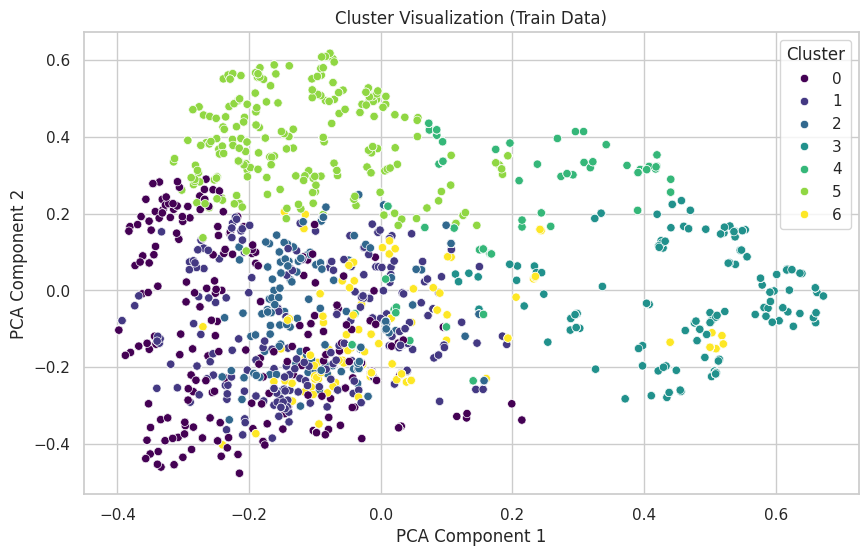

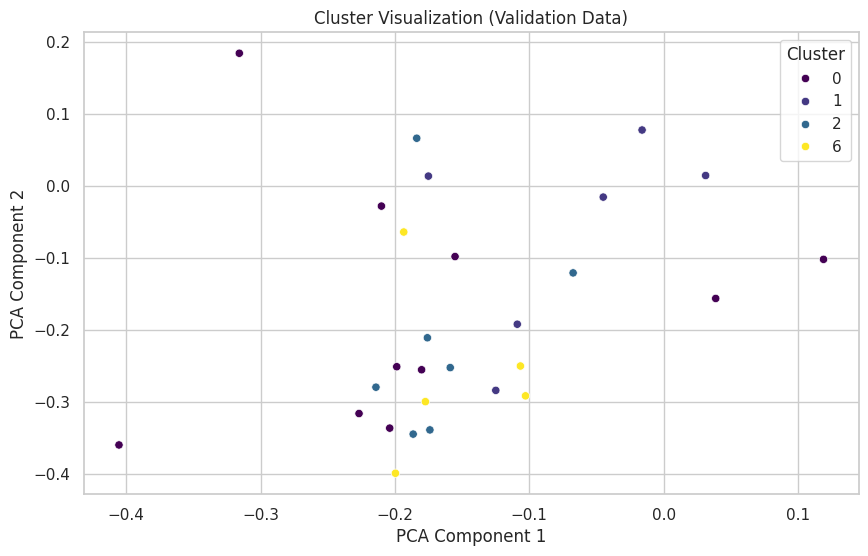

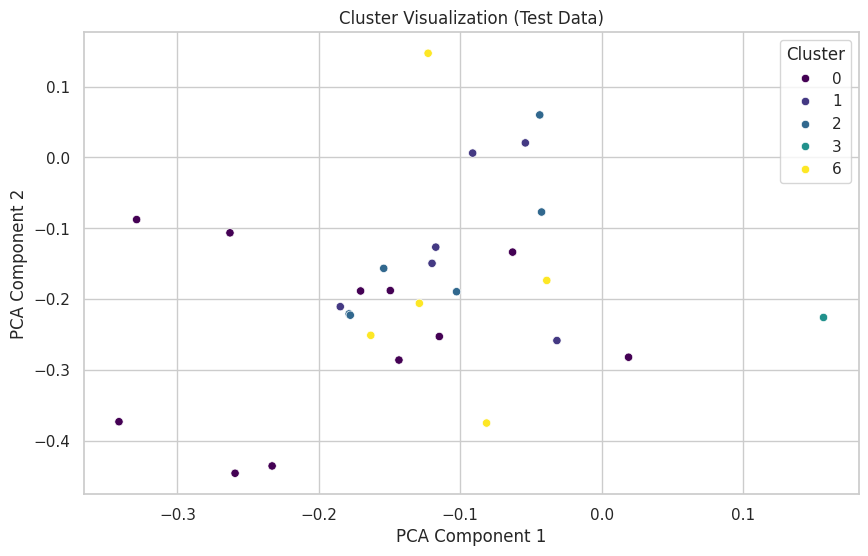

In [ ]:
# Calculate silhouette score for training data
train_silhouette_score = round(silhouette_score(train_data_kpca, train_labels), 2)
val_silhouette_score = round(silhouette_score(val_data_kpca, val_labels), 2)
test_silhouette_score = round(silhouette_score(test_data_kpca, test_labels), 2)

print("Train Silhouette Score:", train_silhouette_score)
print("Validation Silhouette Score:", val_silhouette_score)
print("Test Silhouette Score:", test_silhouette_score)

# Calculate Calinski-Harabasz score for training, validation, and testing data
train_calinski_score = round(calinski_harabasz_score(train_data_kpca, train_labels), 2)
val_calinski_score = round(calinski_harabasz_score(val_data_kpca, val_labels), 2)
test_calinski_score = round(calinski_harabasz_score(test_data_kpca, test_labels), 2)

print("Train Calinski-Harabasz Score:", train_calinski_score)
print("Validation Calinski-Harabasz Score:", val_calinski_score)
print("Test Calinski-Harabasz Score:", test_calinski_score)

# Calculate Davies-Bouldin score for training, validation, and testing data
train_davies_bouldin_score = round(davies_bouldin_score(train_data_kpca, train_labels), 2)
val_davies_bouldin_score = round(davies_bouldin_score(val_data_kpca, val_labels), 2)
test_davies_bouldin_score = round(davies_bouldin_score(test_data_kpca, test_labels), 2)

print("Train Davies-Bouldin Score:", train_davies_bouldin_score)
print("Validation Davies-Bouldin Score:", val_davies_bouldin_score)
print("Test Davies-Bouldin Score:", test_davies_bouldin_score)

# Visualization of the clusters (PCA components) for training data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data_kpca[:, 0], y=train_data_kpca[:, 1], hue=train_labels, palette='viridis')
plt.title('Cluster Visualization (Train Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Visualization of the clusters (PCA components) for validation data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=val_data_kpca[:, 0], y=val_data_kpca[:, 1], hue=val_labels, palette='viridis')
plt.title('Cluster Visualization (Validation Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Visualization of the clusters (PCA components) for testing data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_data_kpca[:, 0], y=test_data_kpca[:, 1], hue=test_labels, palette='viridis')
plt.title('Cluster Visualization (Test Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

**Kernel PCA: Sigmoid vs RBF**

In [ ]:
# Step 1: Standard Scaling
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)

# Convert scaled data back to DataFrames for compatibility with `preprocess_data`
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns)
val_data_scaled_df = pd.DataFrame(val_data_scaled, columns=val_data.columns)

# Step 2: Apply additional data preprocessing (assuming preprocess_data is already defined)
corr_red_train = preprocess_data(train_data_scaled_df)
corr_red_val = preprocess_data(val_data_scaled_df)

# Step 3: Define function for KernelPCA + KMeans + metrics computation
def compute_metrics(kernel_type, train_data_kpca, val_data_kpca, n_clusters=7):
    # K-Folds Cross-Validation Setup
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust number of splits as needed

    # Store the clustering results from each fold
    silhouette_scores = []
    davies_bouldin_scores = []

    for train_index, test_index in kf.split(train_data_kpca):
        # Split the data
        X_train, X_test = train_data_kpca[train_index], train_data_kpca[test_index]

        # Fit KMeans Clustering on the training data
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Adjust as needed
        kmeans.fit(X_train)

        # Predict cluster labels for the test fold
        test_labels = kmeans.predict(X_test)

        # Calculate metrics
        silhouette = silhouette_score(X_test, test_labels)
        davies_bouldin = davies_bouldin_score(X_test, test_labels)

        silhouette_scores.append(silhouette)
        davies_bouldin_scores.append(davies_bouldin)

    # Compute the average metrics for this kernel
    avg_silhouette = np.mean(silhouette_scores)
    avg_davies_bouldin = np.mean(davies_bouldin_scores)

    return avg_silhouette, avg_davies_bouldin

# Step 4: Apply KernelPCA with sigmoid Kernel
kernel_pca_sigmoid = KernelPCA(kernel='sigmoid', n_components=10)  # Adjust n_components as needed
train_data_kpca_sigmoid = kernel_pca_sigmoid.fit_transform(corr_red_train)
val_data_kpca_sigmoid = kernel_pca_sigmoid.transform(corr_red_val)

# Step 5: Apply KernelPCA with RBF Kernel
kernel_pca_rbf = KernelPCA(kernel='rbf', n_components=10)  # Adjust n_components as needed
train_data_kpca_rbf = kernel_pca_rbf.fit_transform(corr_red_train)
val_data_kpca_rbf = kernel_pca_rbf.transform(corr_red_val)

# Step 6: Compute metrics for Sigmoid Kernel
silhouette_sigmoid, davies_bouldin_sigmoid = compute_metrics('sigmoid', train_data_kpca_sigmoid, val_data_kpca_sigmoid)

# Step 7: Compute metrics for RBF Kernel
silhouette_rbf, davies_bouldin_rbf = compute_metrics('rbf', train_data_kpca_rbf, val_data_kpca_rbf)

# Step 8: Print results with 3 significant figures
print(f"Sigmoid Kernel - Average Silhouette Score: {round(silhouette_sigmoid, 3)}")
print(f"Sigmoid Kernel - Average Davies-Bouldin Index: {round(davies_bouldin_sigmoid, 3)}")
print(f"RBF Kernel - Average Silhouette Score: {round(silhouette_rbf, 3)}")
print(f"RBF Kernel - Average Davies-Bouldin Index: {round(davies_bouldin_rbf, 3)}")

Sigmoid Kernel - Average Silhouette Score: 0.172
Sigmoid Kernel - Average Davies-Bouldin Index: 1.782
RBF Kernel - Average Silhouette Score: 0.246
RBF Kernel - Average Davies-Bouldin Index: 1.496
